In [ ]:
import numpy as np
!pip install -q git+https://github.com/tensorflow/docs
!pip install heartpy
!pip install git+https://www.github.com/keras-team/keras-contrib.git
import random
from __future__ import division #para que la division de enteros de un float y no el floor de la division
import skimage
import scipy
from skimage import morphology
import pandas as pd
import csv
from numpy import *
import heartpy as hp
from scipy.signal import butter, lfilter
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy.signal import convolve as sig_convolve
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# import peakutils
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
!pip install heartpy
!pip install wfdb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Activation,BatchNormalization, Convolution2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam,SGD,RMSprop
from keras_contrib.callbacks import CyclicLR
from keras.losses import huber_loss



drive.mount('/content/drive')

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_24d4cva
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_24d4cva
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=71fae0be49c8832c99597bb354cf48e230c1ba8c4f3f4b57b2901917c471fa7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-pf_srfjb/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 163kB 7.3MB/s 
     |████████████████████████████████| 6.6MB 8.3MB/s 


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Estimación de Presión Parcial a partir de PPG

## Presión Arterial (BP)


La presión arterial se define como la tensión que ejerce la sangre al circular por los distintos vasos sanguíneos. La misma viene dada por dos valores, un valor sistólico que corresponde a la fuerza ejercida al momento de la contracción del corazón y un valor diastólico que se da cuando el corazón se relaja. Estos valores constituyen un índice básico que refleja la hemodinamia del paciente y tienen gran importancia a la hora del diagnóstico. Es por esto que es necesario poder obtener una medición precisa de la presión arterial. Para esto, existen mediciones continuas o mediciones discretas.
La curva estándar de la presión arterial se puede observar en la figura.

![BP](https://qph.fs.quoracdn.net/main-qimg-1af540bd3a1fd15741872a36ecde61b2.webp)

## PPG


La fotoplestimografía (PPG) es una técnica óptica que permite obtener la curva de plestimograma que refleja los cambios del volumen de sangre en los vasos sanguíneos. Esta curva se puede adquirir a partir del oxímetro de pulso y, actualmente, se utiliza principalmente para medir la saturación de oxígeno en sangre. La curva obtenida a partir de PPG está compuesta por una componente pulsátil (AC) que contiene información sobre los cambios de volúmenes generados por el ciclo cardíaco pulso a pulso y una componente continua que varía lentamente (DC) que viene modificada por la absorbancia de los huesos, de los tejidos y de otros factores. Además, como se puede observar en la figura, la curva suele tener un pico primario o pico sistólico, un dicrotic notch y por último un pico secundario o pico diastólico .


![PPG](https://d3i71xaburhd42.cloudfront.net/aee6e3fbaf14ed5da8275769d1c8597d75677764/4-Figure1-1.png)

## Relación PPG-BP: Objetivo

Si bien no se ha demostrado la relación directa, se estima que existe dada la alta similitud morfológica entre las curvas, la cual fue demostrada por  Martinez et al. realizado en el 2018, tanto temporalmente como frecuencialmente. Es por esto que, investigaciones recientes, buscan estimar la BP a partir del uso de PPG utilizando redes neuronales artificales, lo que permitiría un método de medición continua, no invasiva y rápida de la presión arterial. El objetivo, entonces, radica en poder obtener una estimación de la BP a partir de la curva de PPG, alcanzando la calidad médica que, seguún la American National Standards of the Association for the Advancement of Medical Instrumentation consistiría en que el error de meidición fuera de 5 ± 8 mmHg.




## Base de datos

<div style='text-align: justify;'> 
  La base de datos utilizada para realizar dicho trabajo fue MIMIC III (Medical Information  Mart  for  Intensive  Care).  La  misma  es  de  uso  libre  y  se  puede encontrar en PhysioNet. MIMIC III se divide en dos partes fundamentales: labase de datos que contiene las curvas fisiológicas de los pacientes (The MIMIC-III Waveform Database) y la base de datos que contiene los datos clínicos del paciente(The MIMIC-III Clinical Database). 
  Es importante destacar que no todos los pacientes en The MIMIC-III Clinical Database tiene registros de curvas fisiológicas. Debido a que el interés del trabajo no es sólo trabajar con las curvas de PPG y de BP sino que también realizar un análisis estadístico y trabajar con variables como lo son la edad, alturas y pesos de los pacientes, se utilizó un subconjunto de MIMIC III, The MIMIC-III Waveform Data-base Matched Subset. Esta última contiene información de los pacientes que tienen información registrada tanto en The MIMIC-III Waveform Database como en The MIMIC-III Clinical Database relacionados por un mismo SUBJECTID. Todos los datos de un paciente se encuentran guardados en subdirectorios (XXNNNN) basados en el SUBJECTID. Luego estos subdirectorios se dividen en diez directorios de ni-vel intermedio, de p00 a p09. Por lo tanto, el nombre de cada archivo tiene la forma:pXX/pXXNNNN/pXXNNNN-YYYY-MM-DD-hh-mm. Donde pXX corresponde al directorio  de  nivel  intermedio,  pXXNNNN  es  el  subdirectorio  y  YYYY-MM-DD-hh-mm son el año, el mes, el día, la hora y los minutos en el que se tomaron las mediciones.

  Se utilizó la libreria urllib para leer el url de la página de physiobank que contiene la base de datos.
  
</div>

Una vez abierta el URL, se utilizó el siguiente código para descargar la información necesaria en todas las partes de la base de datos. Se descargaron los archivos que contengan ABP y PPG exclusivamente. De esta manera, se hizo filtro y se disminuyó la cantidad de datos descargados ya que no todos poseían ambas señales. Los datos descargados se fueron almacenando en distintas carpetas de Google Drive. Cabe destacar que la descarga se tuvo que hacer en partes ya que al ser tan grande, a Google Collab se le crasheaba la RAM y el runtime. Se decidió guardar en Google Drive debido a que el ITBA proporciona un tamaño ilimitado. Este código solo funciona en python 2.

In [ ]:
patients=[]#va a ser una lista de listas
p= urllib2.urlopen('https://archive.physionet.org/physiobank/database/mimic3wdb/matched/RECORDS')
temp=0
patient_temp=[]
for line in p.readlines():
  patient=line.split('/')
  s=patient[1][2]#me dice el directorio
  if (int(s)==temp):
    patient_temp.append(patient[1])
    
  else:
    temp+=1
    patients.append(patient_temp)
    
    patient_temp=[]
    patient_temp.append(patient[1])
  
patients.append(patient_temp)  #para la 9 
stages=['p00','p01','p02','p03','p04','p05','p06','p07','p08','p09']

for stage in stages:
  print('New Stage')
  for p in patients:
    print(p)
    record_list=wfdb.get_record_list('mimic3wdb/matched/'+stage+'/'+p) #este me trae todos los nombres de los archivos del paciente
    record_list_red=record_list[(record_list.index('3495214_0272')+1):]
    if len(record_list)!=0:
      
      # print(len(record_list))
      for file_name in record_list:
        header=wfdb.rdheader(file_name,pb_dir='mimic3wdb/matched/'+stage+'/'+p)

        desired_columns=['PLETH','ABP']

        if(header.sig_name):

          if ((desired_columns[0] in header.sig_name )&(desired_columns[1] in header.sig_name)): #solo descargo el .dat si tiene la info que necesito

            cwd = os.getcwd()
            dl_dir = os.path.join(cwd, 'drive/My Drive/Proyecto Final/MIMIC/p08/'+p)

            file=[file_name+'.dat']

            wfdb.dl_files('mimic3wdb/matched/'+stage+'/'+p, dl_dir , file)

            signals, fields = wfdb.rdsamp(file_name, pb_dir='mimic3wdb/matched/'+stage+'/'+p)

            column_indexes=[fields['sig_name'].index(sig_name) for sig_name in desired_columns]
            signals_to_save=signals[:,column_indexes]
            
            delimiter=','
            header=delimiter.join(desired_columns)
            np.savetxt(path_drive+ stage+'/'+p+'/' + file_name +'.csv',signals_to_save,delimiter=delimiter,header=header)
            
            del(signals)
            del(fields)
            
      del(record_list)

Una vez descargada la información, se procedió analizarlas. Se pudo comprobar que dentro de la base de datos había información basura y segmentos de mala calidad que no podrían ser utilizadas, por lo que se trató de eliminar esto. También se decidió eliminar todas aquellas señales que tuviesen una duración menor a los 30s para asegurarnos cierta estabilidad en el dataset. 

In [ ]:
#devuelve 1 si el archivo tiene mas de 30 s de señal, 0 de lo contrario.
def classify_file_size(path_drive):
  peso = os.path.getsize(path_drive)
  cantidad_bytes_30s = 12+125*(30*125) #peso en bytes de un archivo en csv con 30s

  if(peso>= cantidad_bytes_30s):
    return 1
  else:
    return 0

## Clasificadores de señal

Para la clasificación de señales se probaron distintos clasificadores, usando como features la kurtosis de la señal y la kurtosis de la transformada de Fourier de la señal. Para el clasificador de señales de PPG, se incluyó además la medida de skewness. A continuación se presenta el código para importar los modelos elegidos con la mejor especifidad y selectividad conseguida. Las funciones utilizadas para el modelo se encuentran definidas a continuación.

In [ ]:
def kurtosis(ppg):
  N = len(ppg)
  suma = 0
  mu = np.mean(ppg)
  s = np.std(ppg)

  for i in range(N):
    suma = suma + (ppg[i]-mu)**4

  suma = suma/(N*(s)**4)
  return suma
def kurtosis_fft(ppg):
  ppg_fft=abs(np.fft.fft(ppg)[13:625])
  N = len(ppg_fft)
  suma = 0
  mu = np.mean(ppg_fft)
  s = np.std(ppg_fft)

  for i in range(N):
    suma = suma + (ppg_fft[i]-mu)**4

  suma = suma/(N*(s)**4)
  return suma

def skew_libro(ppg):
  N=len(ppg)
  s=np.std(ppg)
  mu=np.mean(ppg)
  suma=0
  for i in range(N):
    suma=suma+((ppg[i]-(mu))**3)
  suma=suma/(N*(s**3))
  return suma

### Clasificador para las señales de PPG

In [ ]:
import pickle
filename = '/content/drive/My Drive/Proyecto Final/Clasificadores de Señal/PPG/RL_PPG_250_kFFT_k_skewlibro.sav'
 
# load the model from disk
loaded_model_ppg = pickle.load(open(filename, 'rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Clasificador de señales ABP

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Proyecto Final/Clasificadores de Señal/ABP/RL_ABP_125_kFFT_k.sav'
 
# load the model from disk
loaded_model_abp = pickle.load(open(filename, 'rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Una vez clasificados los segmentos, se procedió a filtrarlos, normalizarlos sacándole el corrimiento de línea de base y extraerle features.  Se decidió filtrar la señal de PPG con un filtro Butterworth pasabajos dado que la información importante está en las frecuencias bajas y no filtrar la señal de ABP para no crear alteraciones en lo que sería el Gold Standard del dataset. Además se eliminaron los valores NaN de encontrarse. A continuación se encuentran las funciones definidas.




## Filtrado

In [ ]:
def sacar_corrimiento(signal,signal_wd):
  rolling_mean = signal_wd.get('rolling_mean')

  sin_corrimiento = signal-rolling_mean
  return sin_corrimiento

def nans(signal):
  for i, item in enumerate(signal):
    if (isnan(item)):
      signal[i] = 0
    
  return signal
  
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Obtener pulso

Se decidió cortar la señal para obtener los pulsos separados. De esta forma se pueden extraer features según lo consultado en la bibliografía. La función cortar_pulso toma un segmento de señal y separa los pulsos cortando entre valores mínimos. 

In [ ]:
def min_cl(pos_min,val_min,media):

  minimos_provisorios = []
  for i in range(len(pos_min)):
    if(val_min[i]>= 0.85*media):
      minimos_provisorios.append(pos_min[i])
      
  minimos_reales = list(minimos_provisorios)

  for k in range(1,len(minimos_provisorios)):    
    actual = minimos_provisorios[k-1]
    siguiente = minimos_provisorios[k]

    diferencia = siguiente-actual
    if(diferencia<42):
      minimos_reales.remove(minimos_provisorios[k])

  return minimos_reales

Analizamos todo lo comentado con un archivo de un paciente

Text(0.5, 1.0, 'PPG en segmento elegido sin nans ni corrimiento')

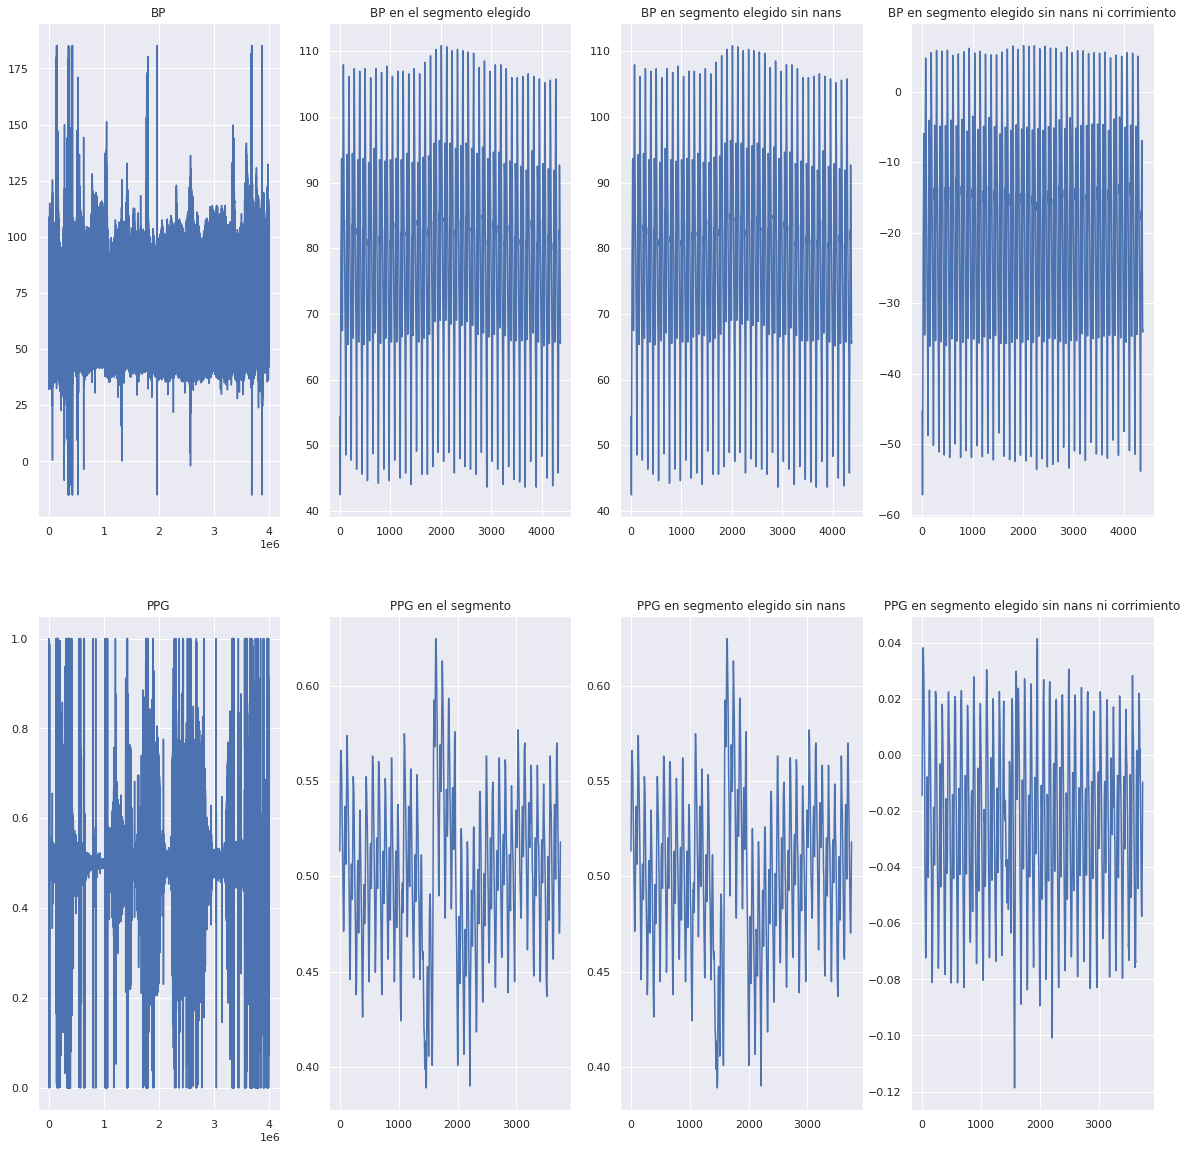

In [ ]:
path_archivo='/content/drive/My Drive/Proyecto Final/MIMIC/p00/p001501/3016830_0044.csv'

archivo=pd.read_csv(path_archivo)
PPG = pd.DataFrame(archivo, columns= ['# PLETH'])
ABP= pd.DataFrame(archivo, columns= ['ABP'])
fs = 125

b1_i=3995687
b1_f=4000063
abp_1=ABP['ABP'][b1_i:b1_f].values #me quedo con la señal en un segmento
s1_i=3996000
s1_f=3999750
ppg_1=PPG['# PLETH'][s1_i:s1_f].values #me quedo con la señal en un segmento

fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(20,20))

axs[0,0].plot(ABP)
axs[0, 0].set_title('BP')
axs[0,1].plot(abp_1)
axs[0, 1].set_title('BP en el segmento elegido')
abp_nan=nans(abp_1)# saco los nans
axs[0,2].plot(abp_nan)
axs[0, 2].set_title('BP en segmento elegido sin nans')
wd,m=hp.process(abp_nan,fs)#a la curva sin nans le saco el corrimiento
abp_sin_corr=sacar_corrimiento(abp_nan,wd)
axs[0,3].plot(abp_sin_corr)
axs[0, 3].set_title('BP en segmento elegido sin nans ni corrimiento')

axs[1,0].plot(PPG)
axs[1, 0].set_title('PPG')
axs[1,1].plot(ppg_1)
axs[1, 1].set_title('PPG en el segmento')
ppg_nan=nans(ppg_1)#saco los nans
axs[1,2].plot(ppg_nan)
axs[1, 2].set_title('PPG en segmento elegido sin nans')
wd,m=hp.process(ppg_nan,fs)
ppg_sin_corr=sacar_corrimiento(ppg_nan,wd)# saco el corrimiento
axs[1,3].plot(ppg_sin_corr)
axs[1, 3].set_title('PPG en segmento elegido sin nans ni corrimiento')

Se busca encontrar los picos de sistólica con la función picos la cual usa la función min_cl como se comento antes y tambien la función max_cl. Esta última función analiza que la frecuencia cardíaca este entre 30 y 180 bpm y que los picos superen el 85% de la media para evitar errores. La función picos devuelve la posición de los picos máximos y mínimos y sus respectivos valores.




In [ ]:
def max_cl(pos_max,hr,media):
  fs=125
  peaks_sist=[]
  for peak in pos_max:
    if (hr[peak]>0.85*media):
      peaks_sist.append(peak)

  peaks_sist_cl=[]
  for i in range(len(peaks_sist)-1):
    samples=peaks_sist[i+1]-peaks_sist[i]
    bpm=60/(samples/fs)
    if ((bpm<180)&(bpm>30)):
      peaks_sist_cl.append(peaks_sist[i])

  return peaks_sist_cl

def min_cl(pos_min,val_min,media):

  minimos_provisorios = []
  for i in range(len(pos_min)):
    if(val_min[i]>= 0.85*media):
      minimos_provisorios.append(pos_min[i])
      
  minimos_reales = list(minimos_provisorios)

  for k in range(1,len(minimos_provisorios)):    
    actual = minimos_provisorios[k-1]
    siguiente = minimos_provisorios[k]

    diferencia = siguiente-actual
    if(diferencia<42):
      minimos_reales.remove(minimos_provisorios[k])

  return minimos_reales

def picos(signal):

  w,m=hp.process(signal,125)
  pos_maximos = w.get('peaklist')
  hr=w.get('hr')
  media=np.mean(signal[pos_maximos])

  maximos=max_cl(pos_maximos,hr,media) 
  val_maximos = signal[maximos]

  inver = -signal
  winv, minv = hp.process(inver, 125)
  pos_minimos = winv.get('peaklist')
  val_minimos = inver[pos_minimos]

  media=np.mean(val_minimos)
  minimos=min_cl(pos_minimos,val_minimos,media)
  val_minimos=signal[minimos]

  return [maximos,val_maximos, minimos,pos_minimos]

A continuación se observa el resultado de la función picos en donde en azul se encuentran los picos de sistólica y en naranja los picos mínimos entre los cuales se desea cortar para obtener los pulsos.

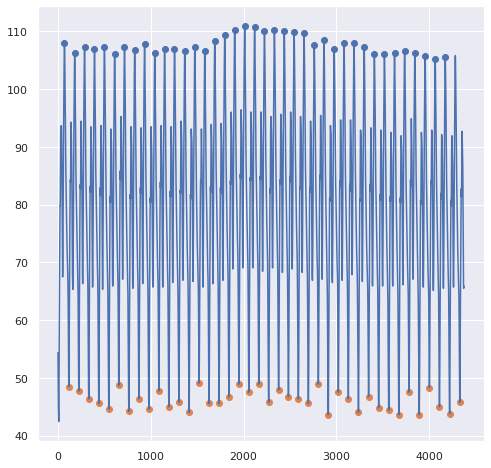

In [ ]:
abp_peaks = picos(abp_1)
abp_maxs = abp_peaks[0]
abp_sist = abp_1[abp_maxs]
abp_mins = abp_peaks[3]
abp_valmins = abp_1[abp_mins]

plt.figure(figsize=(8,8))
plt.plot(abp_1)
plt.scatter(abp_maxs,abp_sist)
plt.scatter(abp_mins,abp_valmins)

Para esto cortar la señal en los distintos pulso se decidió invertir la señal y tomar los máximos que se obtienen facilmente con la función hp.process(). Además la función arroja los valores de los picos de sistólica.
Esta función toma los valores de la función inversa y mediante hp.process obtiene todos los valores máximos, es decir, los minimos en la función original. Luego llama a la función min_cl que limpia la lista de mínimos para que todos estos se encuentren por encima del 85% de la media en la función invertida. Esto disminuye muchos errores. Además se busca que la diferencia de posiciones entre mínimos sea mayor 42 muestras ya que si se asume que la frecuencia cardíaca máxima con la que podemos contar es 180 bpm, lo cual es muy elevada y se debe tener en cuenta que estas mediciones se toman en reposo, la diferencia en tiempo es de 1/3 s y sabiendo que la fs es de 125 se obtiene este valor.

A continuación se definen las funciones para cortar los pulsos de ppg (cortar_pulsos_ppg) y bp (cortar_pulsos_abp). También se incorpora la función sacar_posiciones_pulsos que devuelve las posiciones iniciales y finales de los pulsos del segmento REAL, es decir, completo.

In [ ]:
def cortar_pulsos_ppg(signal):

  inver=-signal
  winv,minv=hp.process(inver,125)
  pos_minimos = winv.get('peaklist')
  val_minimos=inver[pos_minimos]
  media=np.mean(val_minimos)
  min_reales=min_cl(pos_minimos,val_minimos,media)

  pulse=[]
  peaks=[]
  for i in range(len(min_reales)-1):
      pulse.append(signal[min_reales[i]:min_reales[i+1]])#tengo un pulso entero entree 2 minimos
      pico=np.amax(pulse[i])
      pos=list(pulse[i]).index(pico)
      peaks.append(pos)
 
  return pulse,min_reales, peaks

def cortar_pulsos_abp(signal):

  _,_,_,minimos = picos(signal)
  min_reales = minimos #porque la funcion picos ya checkea que sean reales

  pulse=[]
  peaks=[]
  for i in range(len(min_reales)-1):
      pulse.append(signal[min_reales[i]:min_reales[i+1]])#tengo un pulso entero entree 2 minimos
      pico=np.amax(pulse[i])
      pos=list(pulse[i]).index(pico)
      peaks.append(pos)
  i=0
  return pulse,min_reales,peaks

def sacar_posiciones_pulsos(minims,pos_i):
  #devuelve las posiciones inicial y final de los pulsos del segmento dado REALES dentro del archivo
  posiciones = []
  for i in range(len(minims)-1):
    posiciones.append([minims[i]+pos_i, minims[i+1]+pos_i])
  return posiciones

Obtenemos el pulso cortado entre minimos relativos con la función cortar_pulsos_abp y marcamos el pico de sistolica en BP invasiva. Esto luego va a servir para obtener un valor de presión arterial por pulso de BP. A continuación se presenta el resultado con un solo pulso.

Text(0.5, 1.0, 'Pulso cortado de BP')

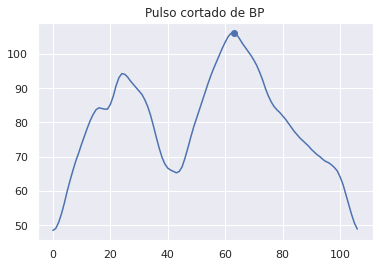

In [ ]:
pulso,notch,picos_s = cortar_pulsos_abp(abp_1)
plt.plot(pulso[0])
plt.scatter(picos_s[0], pulso[0][picos_s[0]])
plt.title('Pulso cortado de BP')

Una vez que se tienen todos los pulsos separados se debe analizar a que pulso de ppg corresponde. De esa manera cuando se le asigne un valor de presión sistólica y uno de diastólica no se cometeran errores.

In [ ]:
def centro_pulso(posiciones):
  center = (posiciones[1]-posiciones[0])/2
  return center

def encontrar_pulso_central(pos_pulso_ppg, pos_pulsos_abp):
  pos_i_ppg = pos_pulso_ppg[0]
  pos_f_ppg = pos_pulso_ppg[1]

  center_ppg = centro_pulso(pos_pulso_ppg) + pos_i_ppg

  distancia_minima = 1000000
  pos_pulso_central = 0

  for i in range(len(pos_pulsos_abp)):
    pulso_abp_actual = pos_pulsos_abp[i]
    pos_i_abp = pulso_abp_actual[0]
    pos_f_abp = pulso_abp_actual[1] 
    center_abp = centro_pulso(pulso_abp_actual) + pos_i_abp

    distancia = abs(center_ppg-center_abp)

    if(distancia<distancia_minima):
      distancia_minima = distancia
      pos_pulso_central = i

    else:
      if((distancia == distancia_minima) and (pos_i_abp >= pos_i_ppg and pos_f_abp <= pos_f_ppg)): #si la distnacia es igual a la minima encontrada y el pulso se encuentra contenido totalmente
          pos_pulso_central = i

  return pos_pulso_central, distancia_minima

def linkear_pulsos(signal_ppg, pos_i_ppg, signal_abp,pos_i_abp):
  #asumo como que en signal ya le estoy pasando los segmentos correspondientes pero podria cambiarse
  #tambien necesito las posiciones iniciales de los segmentos en el archivo real

  _, minimos_abp,_ = cortar_pulsos_abp(signal_abp)
  pulsos_ppg, minimos_ppg,_ = cortar_pulsos_ppg(signal_ppg)
  Nppg = len(pulsos_ppg)
  posiciones_pulsos_abp = sacar_posiciones_pulsos(minimos_abp, pos_i_abp)
  posiciones_pulsos_ppg = sacar_posiciones_pulsos(minimos_ppg, pos_i_ppg)
  numero_pulsos_correspondientes = []
  posiciones_pulsos_correspondientes = []

  for i in range(Nppg):
  
    pos_ppg = posiciones_pulsos_ppg[i] #agarra la primera y ultima posicion del pulso i de ppg
    pos_central,_ = encontrar_pulso_central(pos_ppg, posiciones_pulsos_abp)
    numero_pulsos_correspondientes.append([i, pos_central])
    posiciones_pulsos_correspondientes.append([pos_ppg,posiciones_pulsos_abp[pos_central]])

  return numero_pulsos_correspondientes, posiciones_pulsos_correspondientes #devuelvo numero de pulsos correspondientes de a pares [x,y] y las posiciones de esos pulsos dentro de los vectores

Con esta función se obtienen los distintos valores de presión, diastólica y sistólica, en cada pulso. Para esto corta los pulsos y usa la función linkear_pulsos para asignar los valores de forma correcta. Basicamente, linkear_pulsos asocia un pulso de ppg a uno de bp. Como existe un desfasaje desconocido entre ambas señales, obtener BP asocia a un pulso de ppg una presión arterial que es resultado del promedio de dos presiones arteriales: la de su pulso asociado en bp (obtenido mediante linkear pulsos) y la del anterior. En caso en que sea el primero, y no exista pulso anterior, que únicamente el valor asociado de bp.

In [ ]:
def obtener_BP(signal_ppg, signal_abp, pos_i_ppg, pos_i_abp):
  ppg_nan=nans(signal_ppg)
  
  wd,m=hp.process(ppg_nan,125)
  ppg_sin_corr=sacar_corrimiento(ppg_nan,wd)
 
  cutoff = 8
  ppg_filtrada = butter_lowpass_filter(ppg_sin_corr, cutoff, fs, order=4)
  pulsos_ppg,_,_ = cortar_pulsos_ppg(ppg_filtrada)
  pulsos_abp,_,_ = cortar_pulsos_abp(signal_abp)
  presiones = calculo_ABP(signal_abp)
  pos_pulsos,pos_reales_pulsos = linkear_pulsos(ppg_filtrada,pos_i_ppg, signal_abp, pos_i_abp)

  results = []
  # results_array = np.zeros([len(pulsos_ppg), 3])
  j = 0 
  
  for i in range(len(pulsos_ppg)):
    pulse_abp = pos_pulsos[i][1]
    pulse_ppg = pos_pulsos[i][0]

    if(pulse_abp == 0):
      j = i+1
      results.append([pos_pulsos[i],pos_reales_pulsos[i],presiones[pulse_abp]])
    else:
      results.append([pos_pulsos[i],pos_reales_pulsos[i],(presiones[pulse_abp]+presiones[pulse_abp-1])/2])

  return results

Del segmento elegido se comienza sacando los nans y el corrimiento de base de linea

In [ ]:
ppg_1_nan=nans(ppg_1)
wd_1,m_1=hp.process(ppg_1_nan,125)
ppg_1_sin_corr=sacar_corrimiento(ppg_1,wd_1)
cutoff = 8
y1 = butter_lowpass_filter(ppg_1_sin_corr, cutoff, fs, order=4)

j,k = linkear_pulsos(y1,s1_i, abp_1, b1_i)

print(j)

print(k)

[[0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9], [8, 10], [9, 11], [10, 12], [11, 13], [12, 14], [13, 15], [14, 16], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35]]
[[[3996069, 3996178], [3996018, 3996126]], [[3996178, 3996284], [3996126, 3996234]], [[3996284, 3996392], [3996234, 3996342]], [[3996392, 3996502], [3996342, 3996451]], [[3996502, 3996609], [3996451, 3996559]], [[3996609, 3996717], [3996559, 3996666]], [[3996717, 3996824], [3996666, 3996774]], [[3996824, 3996932], [3996774, 3996882]], [[3996932, 3997043], [3996882, 3996990]], [[3997043, 3997151], [3996990, 3997100]], [[3997151, 3997259], [3997100, 3997208]], [[3997259, 3997365], [3997208, 3997315]], [[3997365, 3997473], [3997315, 3997423]], [[3997473, 3997515], [3997423, 3997530]], [[3997515, 3997578], [3997530, 3997637]], [[3997578, 3997688], [3997530, 39976

In [ ]:
def plotear_pulsos(signal_ppg, signal_abp, pos_i_ppg, pos_i_abp):
  ppg_1_nan=nans(signal_ppg)
  wd_1,m_1=hp.process(ppg_1_nan,125)
  ppg_1_sin_corr=sacar_corrimiento(ppg_1,wd_1)
  cutoff = 8
  y1 = butter_lowpass_filter(ppg_1_sin_corr, cutoff, fs, order=4)

  j,k = linkear_pulsos(y1,s1_i, abp_1, b1_i)
  
  _, minimos_abp,_ = cortar_pulsos_abp(signal_abp)
  pulsos_ppg, minimos_ppg,_ = cortar_pulsos_ppg(y1)

  posiciones_pulsos_abp = sacar_posiciones_pulsos(minimos_abp, pos_i_abp)
  posiciones_pulsos_ppg = sacar_posiciones_pulsos(minimos_ppg, pos_i_ppg)
  print(posiciones_pulsos_ppg)
  plt.figure(1)
  plt.figure(2)
  for i in range(len(j)):
    num_ppg = j[i][0]
    num_abp = j[i][1]

    # print(i)
    # print(num_ppg)

    p1 = posiciones_pulsos_ppg[num_ppg][0] - pos_i_ppg
    p2 = posiciones_pulsos_ppg[num_ppg][1] - pos_i_ppg
    a1 = posiciones_pulsos_abp[num_abp][0] - pos_i_abp
    a2 = posiciones_pulsos_abp[num_abp][1] - pos_i_abp
    plt.figure(1)
    plt.plot(range(p1,p2),y1[p1:p2])
    plt.title('Fotoplestimografía')
    plt.figure(2)
    plt.plot(range(a1,a2),signal_abp[a1:a2])
    plt.title('Presión Arterial')



En los distintos colores se observan los distintos pulsos detectados.

[[3996069, 3996178], [3996178, 3996284], [3996284, 3996392], [3996392, 3996502], [3996502, 3996609], [3996609, 3996717], [3996717, 3996824], [3996824, 3996932], [3996932, 3997043], [3997043, 3997151], [3997151, 3997259], [3997259, 3997365], [3997365, 3997473], [3997473, 3997515], [3997515, 3997578], [3997578, 3997688], [3997688, 3997795], [3997795, 3997901], [3997901, 3998008], [3998008, 3998115], [3998115, 3998217], [3998217, 3998327], [3998327, 3998436], [3998436, 3998542], [3998542, 3998649], [3998649, 3998757], [3998757, 3998865], [3998865, 3998976], [3998976, 3999084], [3999084, 3999194], [3999194, 3999301], [3999301, 3999413], [3999413, 3999522], [3999522, 3999628], [3999628, 3999739]]


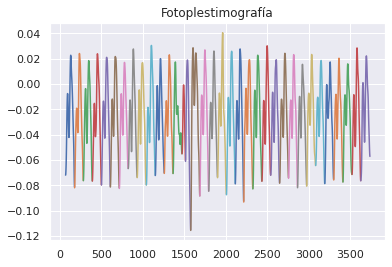

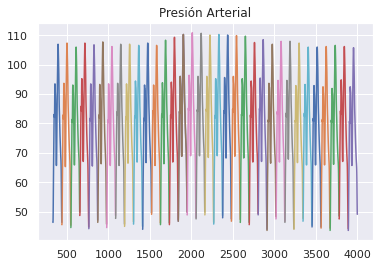

In [ ]:
plotear_pulsos(ppg_1, abp_1, s1_i, b1_i)

Esto mismo se realiza para todos los archivos y se obtienen los features

##Features seleccionados

En función de la bibliografía consultada y de las investigaciones previas, se decidió trabajar con un total de 12 features, que se encuentran explicados a continuación:



*   PWD: Duración del pulso de PPG (en segundos). 
*   Systolic Phase: Tiempo desde el inicio del pulso de PPG hasta llegar el pico sistólico (en segundos).
*   Diastolic Phase: Tiempo desde el pico sistólico hasta el fin del pulso (en segundos). 
*   Systolic Amplitude: valor de amplitud del pulso de PPG en el tiempo del pico sistólico, es decir en la fase sistólica. 
*   Energía FFT: energía de la transformada rápida de Fourier del pulso de PPG.
*   Kurtosis FFT: kurtosis de la transformada rápida de Fourier del pulso de PPG.
*   Entropía FFT: entropía de la transformada rápida de Fourier del pulso de PPG.
*   Ratio SPDDP: ratio entre la systolic phase y la diastolic phase, calculado como SP/DP.
*   Continua: valor de la componente DC del pulso de PPG. 
*   Age: edad del paciente en cuestión.
*   Gender: sexo del paciente en cuestión. 
*   Ratio BA: se calcula en base a los puntos B y A (ver imagen 2) de la segunda derivada del pulso de PPG, como B/A.

![alt text](https://www.researchgate.net/profile/Thomas_Penzel/publication/317747949/figure/fig1/AS:614214871822370@1523451645965/Pulse-waveform-of-photoplethysmogram-PPG-AC-part-with-pulse-wave-characteristics-4-10_W640.jpg)

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S1746809418302209-gr3.jpg)


## Extracción de Features


En resumen, de la base de datos se terminan extrayendo features de segmentos como lo son la kurtosis o la kurtosis de la transformada de fourier y features correspondiente a pulsos individuales como lo son la amplitud sistólica o la fase sistólica, según lo consultado con la bibliografía. Los features extraidos se guardaron en el Google Drive para usos futuros.

Con el siguiente codigo se obtienen los nombres de todos los pacientes a extraerles los features

In [ ]:
paths = []
 #lista con los nombres de pacientes
for i in range(0,10):
  path_parte='/content/drive/My Drive/Proyecto Final/MIMIC/p0'+ str(i) + '/'
  paths.append(path_parte)

for k in range(0,10):
  list_pacientes=[]
  s=os.listdir(paths[k]) 
  for pacientes in s:
    list_pacientes.append(pacientes)
list_pacientes


Con este código obtenemos una parte de todos los pacientes ya que si lo hacemos con todo crashea la RAM.

In [ ]:
#cuando se corra una parte distinta, cambiar aca y abajo en linea 114 140!
path_parte='/content/drive/My Drive/Proyecto Final/MIMIC/p04/'
s=os.listdir(path_parte) 
fs = 125
cutoff = 8
list_pacientes=[] #lista con los nombres de pacientes
list_pacientes_utiles = [] #lista con nombres de pacientes con por lo menos un segmento util
means_long = [] #va a tener los promedios de longitud para cada paciente!
means_ratio = []
means_sp = []
means_dp = []
std_long = []
std_ratio = []
std_sp = []
std_dp = []
cantidad_pulsos = []
flagsita = 0

for pacientes in s:
  list_pacientes.append(pacientes)

print(len(list_pacientes))
print(list_pacientes)

paciente_inicial = 'p049632' #paciente desde el que se va a empezar inclusive!
paciente_final = 'p049984'
pos_paciente_inicial = list_pacientes.index(paciente_inicial)
pos_paciente_final = list_pacientes.index(paciente_final)
list_pacientes = list_pacientes[pos_paciente_inicial:pos_paciente_final]
list_pacientes = ['p049984']
print(list_pacientes)

Finalmente obtenemos los features y los guardamos por partes en csv.

In [ ]:
warnings.filterwarnings('ignore')
for paciente in list_pacientes: #se mueve de a paciente
  print(paciente)
  flag_util = 0
  path_human=path_parte+paciente
  w=os.listdir(path_human) #lista de los nombres de los archivos
  lista=[] #para cada paciente, crea una lista con los nombres de los archivos CSV
  N_paciente = 0
  long_paciente = 0
  lista_archivos = [] #va a ir al csv de cada paciente en donde se guardan posiciones de segmentos buenos
  posisi = [] #va a ir al csv de cada paciente guardando posiciones dentro de archivos
  longitudes = [] #va a ir almacenando duracion de pulsos
  ratios = [] #va a ir almacenando ratios
  sphase = [] #va a ir almacenando systolic phase
  dphase = [] #va a ir almacenando diastolic phase

  for archive in w: #se mueve en cada archivo del paciente
    posi = [] #lista que va a ir acumulando las posiciones iniciales de los segmentos buenos en ppg
    if ('.csv' in archive): # si el archivo es csv
      lista.append(archive) 
  print(lista)

  for csv in lista:
    try: #por si hay algun archivo roto
      archivo=pd.read_csv(path_human+'/'+csv)
    except:
      continue
    pulses=[]
    PPG = pd.DataFrame(archivo, columns= ['# PLETH']) 
    señal=PPG['# PLETH'].values

    ABP=pd.DataFrame(archivo,columns=['ABP'])
    abp=ABP['ABP'].values
    N=len(señal)
    samples=3750 # son 30 segundos 

    if (classify_file_size(path_human+'/'+csv)==1): 
      for i in range(int(N/samples)): #se mueve de a segmentos de 30 segundos
        segmento_ppg=señal[i*samples:i*samples+samples]
        segmento_ppg_nan=nans(segmento_ppg)
        N_actual = 0 #cantidad de pulsos BUENOS del segmento actual

        if(i==0):
          pos_abp_i=i*samples
          segmento_abp=abp[i*samples:i*samples+samples+375]
          
        else:
          segmento_abp=abp[i*samples-375:i*samples+samples+375]
          pos_abp_i=i*samples-375
        

        k_ppg=kurtosis(segmento_ppg_nan)
        kfft_ppg=kurtosis_fft(segmento_ppg_nan)
        skew=skew_libro(segmento_ppg_nan)

        vector_ppg=[[k_ppg,kfft_ppg,skew]]
        ppg_pred=int(loaded_model_ppg.predict(vector_ppg))

        k_abp=kurtosis(nans(segmento_abp))
        kfft_abp=kurtosis_fft(nans(segmento_abp))

        vector_abp=[[k_abp,kfft_abp]]
        
        if (isnan(vector_abp).any()==True): #si hay un nan en los valores del vector
          abp_pred=0
        else: 
          abp_pred=int(loaded_model_abp.predict(vector_abp))
        
        if (ppg_pred==1 & abp_pred==1):

          try:
            wd_1,m_1 = hp.process(segmento_ppg_nan,fs) 
            flagsita = 100
          except:
            'BadSignalWarning'
            flagsita = -100
            continue
          finally:
            if(flagsita == 100):
              flag_util = 1 #significa que el paciente tiene por lo menos un segmento bueno

              posi.append(i*samples) #si es bueno appendeo a la lista
              segmento_sin_corr=sacar_corrimiento(segmento_ppg_nan,wd_1)
              y1 = butter_lowpass_filter(segmento_sin_corr, cutoff, fs, order=4)
              p,n,pk=cortar_pulso(y1) #p tiene todas las muestras de los pulsos de UN segumento, n la posicion de los notchs y pk las posiciones de pico sist
              flagsita = 0 #reseteo el flag del try
              order = orden_global(p,n,pk)
              N_actual_prov = len(p)

              for j in range(N_actual_prov):
                durat,ratio, sp, dp = feature_time(p[j], pk[j],order)

                if(clasificar_pulso_ppg(sp,ratio,durat)==1): #si el pulso es buena calidad se tiene en cuenta
                  longitudes.append(durat)
                  ratios.append(ratio)
                  sphase.append(sp)
                  dphase.append(dp)
                  N_actual = N_actual + 1 #cantidad de pulsos buenos del segmento actual

              N_paciente = N_paciente + N_actual #voy sumando la cantidad de pulsos buenos de un paciente


      #para cada archivo analizado voy agregando a la lista las posiciones de segmentos buenos
      N_segmentos_archivo = len(posi)
      lista_archivos = lista_archivos + [csv]*N_segmentos_archivo
      coca = list(posi)
      posisi = posisi + coca
      posi = []
      coca = []

  #aca viene cuando ya termino de recorrer todos los archivos y segmentos de UN paciente
  if(flag_util == 1): #si el paciente tiene por lo menos un segmento bueno
    data_seg= {'Archivo':lista_archivos, 'Pos_i_ppg':posisi} 
    dfseg = pd.DataFrame(data_seg) 
    dfseg.to_csv("/content/drive/My Drive/Proyecto Final/Segmentos Clasificados/p04/" + paciente + "segmentos.csv", sep=',', encoding='utf-8', quotechar='"', decimal=',')
    list_pacientes_utiles.append(paciente)

    means_long.append(np.mean(longitudes)) 
    means_ratio.append(np.mean(ratios))
    means_sp.append(np.mean(sphase))
    means_dp.append(np.mean(dphase))

    std_long.append(np.std(longitudes))
    std_ratio.append(np.std(ratios))
    std_sp.append(np.std(sphase))
    std_dp.append(np.std(dphase))

    cantidad_pulsos.append(N_paciente)

#esto lo hace al final, cuando ya tiene features para cada paciente

#cambia pacientes a solo el ID del paciente
nropacientes=[]
for z in range(len(list_pacientes_utiles)):
  id=list_pacientes_utiles[z][1:]
  nropacientes.append(int(id))

data= {'ID Paciente':nropacientes,'Cantidad de Pulsos':cantidad_pulsos,'Longitud Promedio de Pulso':means_long, 'Std longitud pulso': std_long, 'Ratio SD Promedio': means_ratio, 'Std Ratio SD': std_ratio, 'SysPhase Promedio': means_sp, 'Std SysPhase': std_sp, 'DiaPhase Promedio': means_dp, 'Std DiaPhase': std_dp } 
df = pd.DataFrame(data) 

df.to_csv("/content/drive/My Drive/Proyecto Final/PWD_SP_DP_RATIO_p04.csv", sep=',', encoding='utf-8', quotechar='"', decimal=',')

Esto se corrió por todos los pacientes y se obtuvo por cada uno de sus pulsos, una lista de features.

En el siguiente dataframe se puede observar los features de una parte del dataset. Para esto tomamos de las 10 partes del dataset (p00-p09) y de cada parte tomamos los features de los segmentos de buena calidad usando el csv previamente guardado. Se pueden observar un total de 12 features que trabajan tanto en el espacio temporal como en el espacio frecuencial (FFT). Además se incluyeron a la edad y al género como features también para tratar de analizar si hay alguna correlación. Estos dos últimos datos se los obtuvo de la información clínica realizando un análisis estadistico en R.

En un principio se decidió utilizar 10 features de cada paciente (primera celda comentada). A medida que fue avanzando el trabajo se decidió aumentar la cantidad de datos por lo que incrementó la cantidad de features por paciente a 30. 

In [ ]:
# path='/content/drive/My Drive/Proyecto Final/Features/p0'
# data=pd.DataFrame()
# num_archivos=10 #cantidad de pulsos en features que quiero levantar por archivo

# for parte in range(10):
#    s=os.listdir(path+str(parte)) 
#    print('p0'+str(parte))
#    print(s)

#    for csv in s:
#      archivo=pd.read_csv(path+str(parte) +'/'+csv)
#      if len(archivo)<num_archivos:
#        data=pd.concat([data,archivo])
#      else:
#        data=pd.concat([data,archivo[:num_archivos]])
    

#  data

In [ ]:
#con este código puedo levantar la cantidad de datos que se requieran 
path='/content/drive/My Drive/Proyecto Final/Features/p0'
data=pd.DataFrame()
num_archivos=30 #cantidad de pulsos en features que quiero levantar por archivo

for parte in range(10):
   s=os.listdir(path+str(parte)) 
   print('p0'+str(parte))
   print(s)

   for csv in s:
     archivo=pd.read_csv(path+str(parte) +'/'+csv)
     if len(archivo)<num_archivos:
       data=pd.concat([data,archivo])
     else:
       data=pd.concat([data,archivo[:num_archivos]])
    

 data

In [ ]:
#pero para facilitar la explicacion y el procesamiento directamente vamos a usar un csv ya descargado con 30 segmentos de cada parte
data=pd.read_csv('/content/drive/My Drive/Proyecto Final/Features_pruebas_10p_30.csv',sep=',',index_col=0)

Visualizamos los features

In [ ]:
data

,PWD,RatioSPDDP,Sys_phase,Diast_phase,Continua,Ratio BA,Amplitud Sist,Energia FFT,Entropia FFT,Kurtosis FFT,Sistolica,Diastolica,Age,Gender
0,1.008,0.272727,0.216,0.792,0.515152,-1.004271,-0.003657,0.491716,2.175875,77.101415,138.754980,65.417253,58.78,1
1,0.904,0.202128,0.152,0.752,0.489736,-1.444114,-0.010628,0.507864,2.503912,60.760874,139.732816,65.417253,58.78,1
2,0.968,0.551282,0.344,0.624,0.446725,-1.203756,-0.001393,0.715486,2.243611,54.338103,140.221734,65.319469,58.78,1
3,0.984,0.576923,0.360,0.624,0.450635,-1.096413,0.005625,0.736935,2.437377,51.465057,140.515085,65.319469,58.78,1
4,0.920,0.352941,0.240,0.680,0.494624,-1.450588,0.003157,0.499760,2.165449,59.171351,141.297354,65.612820,58.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75054,1.536,0.142857,0.192,1.344,0.293255,-1.145793,0.330923,34.392361,2.839660,20.962611,98.174771,51.238625,65.26,1
75055,0.944,0.242105,0.184,0.760,0.367546,-0.955303,0.386031,25.888029,2.571587,21.511180,100.814929,45.371607,65.26,1
75056,0.776,0.366197,0.208,0.568,0.265885,-0.801683,0.225376,8.215825,2.115532,23.175275,97.783636,45.469391,65.26,1
75057,0.800,0.282051,0.176,0.624,0.313783,-1.034983,0.193274,9.239781,2.580609,19.873318,96.121314,50.358573,65.26,1


Cabe destacar que si bien esta no es toda la información disponible se tienen 75059 listas de features. Esto se puede seguir aumentando pero encontramos problemas con la RAM.

###Ciclo para determinar mejores hiperparámetros

Luego, se creó un ciclo que permitía realizar distintas combinaciones de hiperparámetros para ver cuál era la óptima para entrenar una red. Para esto en primer lugar se crea un ciclo donde se mantienen fijas las cantidades de capas, el optimizador, el learning rate y el batch_size, con lo cual solo variaban la inclusión o exclusión de los features que ya estaban calculados. Es importante destacar que todos los features, exceptuando el género, fueron normalizados, restándole la media y dividiendolo por la varianza.

In [ ]:
#En esta celda se deja el código utilizado para analizar las distintas combinaciones de features para establecer qué features eran mejores.

hyperparameters_specs = {
'PWD': [True, False],
'RatioSPDDP': [True,False],
'Sys_phase': [True, False],
'Ratio BA':[True,False],
'Amplitud Sist':[True,False],
'Energia FFT':[True,False],
'Entropia FFT': [True, False],
'Kurtosis FFT': [True, False],
'Age': [True,False],
'Gender': [True, False],
'Diast_phase': [True, False]}

hyperparameters_dataframe = pd.DataFrame()

for PWD in hyperparameters_specs['PWD']:
  for RatioSPDDP in hyperparameters_specs['RatioSPDDP']:
    for Sys_phase in hyperparameters_specs['Sys_phase']:
      for RatioBA in hyperparameters_specs['Ratio BA']:
        for EnergiaFFT in hyperparameters_specs['Energia FFT']:
          for KurtosisFFT in hyperparameters_specs['Kurtosis FFT']:
            for Age in hyperparameters_specs['Age']:
              for Gender in hyperparameters_specs['Gender']:
                for Diast_phase in hyperparameters_specs['Diast_phase']:
                  for EntropiaFFT in hyperparameters_specs['Entropia FFT']:
                    for AmplitudSist in hyperparameters_specs['Amplitud Sist']:
                      hyperparameters = {
                              'PWD':  PWD,
                              'RatioSPDDP':  RatioSPDDP,
                              'Sys_phase':  Sys_phase,
                              'Ratio BA': RatioBA,
                              'Energia FFT': EnergiaFFT,
                              'Kurtosis FFT': KurtosisFFT,
                              'Age': Age,
                              'Gender': Gender,
                              'Diast_phase': Diast_phase,
                              'Entropia FFT':EntropiaFFT,
                              'Amplitud Sist':AmplitudSist
                              }
                      df = pd.DataFrame(hyperparameters, index=[0])
                      hyperparameters_dataframe = hyperparameters_dataframe.append(df,ignore_index=True)
def get_dataset(hyperparameters,data):
  dataset=data
  features=pd.DataFrame()
  if (hyperparameters['PWD']):
    features=features.append(dataset['PWD'])
  if (hyperparameters['RatioSPDDP']):
    features=features.append(dataset['RatioSPDDP'])
  if (hyperparameters['Ratio BA']):
    features=features.append(dataset['Ratio BA'])
  if (hyperparameters['Sys_phase']):
    features=features.append(dataset['Sys_phase'])
  if (hyperparameters['Energia FFT']):
    features=features.append(dataset['Energia FFT'])
  if (hyperparameters['Kurtosis FFT']):
    features=features.append(dataset['Kurtosis FFT'])
  if (hyperparameters['Age']):
    features=features.append(dataset['Age'])
  if (hyperparameters['Gender']):
    features=features.append(dataset['Gender'])
  if (hyperparameters['Diast_phase']):
    features=features.append(dataset['Diast_phase'])
  return features

In [ ]:
hyperparameters_dataframe

,PWD,RatioSPDDP,Sys_phase,Ratio BA,Energia FFT,Kurtosis FFT,Age,Gender,Diast_phase,Entropia FFT,Amplitud Sist
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,False,False
4,True,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2043,False,False,False,False,False,False,False,False,True,False,False
2044,False,False,False,False,False,False,False,False,False,True,True
2045,False,False,False,False,False,False,False,False,False,True,False
2046,False,False,False,False,False,False,False,False,False,False,True


Luego se decidió eliminar algunos valores de sistólica y diastólica ya que se encontraban outliers. Se lo hizo mediante tomar el rango entre la media y 3 desvíos estándars a ambos lados para así seguir representar el 90% de la población.

In [ ]:
#descarte de outliers
min_sist=np.mean(data['Sistolica'].values)-3*np.std(data['Sistolica'].values)
max_sist=np.mean(data['Sistolica'].values)+3*np.std(data['Sistolica'].values)
min_diast=np.mean(data['Diastolica'].values)-3*np.std(data['Diastolica'].values)
max_diast=np.mean(data['Diastolica'].values)+3*np.std(data['Diastolica'].values)
print(f'El valor mínimo en sistólica es de {min_sist} y el máximo es de {max_sist}')
print(f'El valor mínimo en diastólica es de {min_diast} y el máximo es de {max_diast}')

El valor mínimo en sistólica es de 45.07958577129999 y el máximo es de 211.15062725844797
El valor mínimo en diastólica es de 13.972791654881668 y el máximo es de 113.50633398544869


De todas formas el valor mínimo de sistólica y de diastólica es muy inferior en comparación con la bibliografía. Esto se puede deber a que los pacientes se encuentran en la Unidad de Terapia Intensiva (UTI) y algunos se encuentran con anestesia lo cual se sabe que modifica los valores de presión arterial. Agregamos esta modificación al dataset.

In [ ]:
max_sist=180
min_sist=60
max_diast=110
min_diast=45

In [ ]:
dataset_sist =data[(data['Sistolica'].values<max_sist) & (data['Sistolica'].values>min_sist)]
dataset_features=dataset_sist[(dataset_sist['Diastolica'].values<max_diast) & (dataset_sist['Diastolica'].values>min_diast)]


In [ ]:
dataset_features

,PWD,RatioSPDDP,Sys_phase,Diast_phase,Continua,Ratio BA,Amplitud Sist,Energia FFT,Entropia FFT,Kurtosis FFT,Sistolica,Diastolica,Age,Gender
0,1.008,0.272727,0.216,0.792,0.515152,-1.004271,-0.003657,0.491716,2.175875,77.101415,138.754980,65.417253,58.78,1
1,0.904,0.202128,0.152,0.752,0.489736,-1.444114,-0.010628,0.507864,2.503912,60.760874,139.732816,65.417253,58.78,1
2,0.968,0.551282,0.344,0.624,0.446725,-1.203756,-0.001393,0.715486,2.243611,54.338103,140.221734,65.319469,58.78,1
3,0.984,0.576923,0.360,0.624,0.450635,-1.096413,0.005625,0.736935,2.437377,51.465057,140.515085,65.319469,58.78,1
4,0.920,0.352941,0.240,0.680,0.494624,-1.450588,0.003157,0.499760,2.165449,59.171351,141.297354,65.612820,58.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75054,1.536,0.142857,0.192,1.344,0.293255,-1.145793,0.330923,34.392361,2.839660,20.962611,98.174771,51.238625,65.26,1
75055,0.944,0.242105,0.184,0.760,0.367546,-0.955303,0.386031,25.888029,2.571587,21.511180,100.814929,45.371607,65.26,1
75056,0.776,0.366197,0.208,0.568,0.265885,-0.801683,0.225376,8.215825,2.115532,23.175275,97.783636,45.469391,65.26,1
75057,0.800,0.282051,0.176,0.624,0.313783,-1.034983,0.193274,9.239781,2.580609,19.873318,96.121314,50.358573,65.26,1


Analizamos los hiperparametros en la red

In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-oe5knoxj
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-oe5knoxj
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=28288035a63679c41b89881a81f14f1066a218b0979c32b645c33b1db4358748
  Stored in directory: /tmp/pip-ephem-wheel-cache-emb9xpu4/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


Si bien el mean_absolute_error es mas robusto ante outliers, el mean_squared_error tiene el mismo gradiente en todos los puntos

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Activation,BatchNormalization, Convolution2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam,SGD
from keras_contrib.callbacks import CyclicLR
from keras.losses import huber_loss
import tensorflow as tf

# define the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=3, min_lr=0.0000001,verbose=True)
CLR=CyclicLR(base_lr=0.000005,max_lr=0.005,step_size=4000,mode='triangular2', gamma=0.5,scale_fn=None,scale_mode='cycle')
def huber_loss_wrapper(**huber_loss_kwargs):
    def huber_loss_wrapped_function(y_true, y_pred):
        return huber_loss(y_true, y_pred, **huber_loss_kwargs)
    return huber_loss_wrapped_function

def quantile_loss(q, y_p, y):
        e = y_p-y
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))
def make_nn(hyperparameters,features):
  model=Sequential()
  n_cols=features.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
  model.add(Dense(30, activation='elu',input_shape=(n_cols,),kernel_initializer='he_uniform'))
  # ,kernel_initializer='he_uniform'
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(rate=0.5))
  model.add(BatchNormalization())
  model.add(Dense(5, activation='elu'))
  model.add(Dropout(rate=0.5))
  model.add(BatchNormalization())
  model.add(Dense(2,activation='linear'))
  #model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])
  
  quantile = 0.5
  model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(quantile, y_p, y), metrics=['mean_absolute_error'])
  
  model.summary()
  return model

# define the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.0000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=10,verbose=True,restore_best_weights=True)
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_absolute_error
def make_score_classifier(hyperparameters,data):
  mae=[]
  for index, hp in hyperparameters.iterrows():
    print(hp)

    features=get_dataset(hp,data)
    features=np.transpose(features)
    bp=data[['Sistolica','Diastolica']]
    
    x,x_test,y,y_test=train_test_split(features, bp,test_size=0.1, random_state=42)
    x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.1, random_state=42)

    media=x_train.mean()
    std=x_train.std()
    #if 'Gender' in features.columns:
    #  media['Gender']=0
    #  std['Gender']=1   
    x_train_norm = (x_train - media) / std #estandarizamos los datos
    x_val_norm= (x_val-x_val.mean())/x_val.std()

    model=make_nn(hp,features)
    # model.summary()
    hist=model.fit(x_train_norm, round(y_train), batch_size=1024, epochs=200, verbose=2, shuffle=True, validation_data=(x_val_norm,round(y_val)),callbacks=[stopper,CLR])
    y_pred=model.predict(x_val)
    mean_mae=mean_absolute_error(y_val, y_pred)
    mae.append(mean_mae)
  return acc

def evaluate_hyperparameters(hyperparameters, dataset):
    to = time.time()
    scores = make_score_classifier(hyperparameters,dataset)
    tf = time.time()
    print('finished in', (int(tf-to)), 'seconds.')

    return scores

mae=evaluate_hyperparameters(hyperparameters_dataframe,dataset_features)

hyperparameters['MAE']=mae
best_hp = hyperparameters.loc[hyperparameters['MAE'].idxmin()] #buscamos el menor MAE

In [ ]:
print(best_hp)

Una vez concluído que la mejor combinación de features era cuando se incluían todos, se procedió a afinar la red, y estudiar distintas arquitecturas. Además se probaron distintos optimizadores y funciones de costo. 
Se decidió acotar también el dataset de entrada, tomando sólo aquellos valores en los que la presión sistólica y diastólica se encontraban entre ± 3 veces el desvió estandar alejado de la media. Esto se hizo para reducir los outliers presentes y se pudo observar que mejoró el rendimiento de la red.

A continuación se presenta la mejor red que se pudo encontrar.

In [ ]:
datos=get_dataset(best_hp,dataset_features)
datos=np.transpose(datos)
bp=data[['Sistolica','Diastolica']]

x,x_test,y,y_test=train_test_split(datos, bp,test_size=0.2, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.2, random_state=42)

media_train=x_train.mean()
std_train=x_train.std()
if 'Gender' in x_train.columns:
  media_train['Gender']=0
  std_train['Gender']=1   
features_norm_train= (datos - media_train) / std_train #estandarizamos los datos

media_train=x_train.mean()
std_train=x_train.std()
if 'Gender' in x_train.columns:
  media_train['Gender']=0
  std_train['Gender']=1   
features_norm_train= (datos - media_train) / std_train #estandarizamos los datos


media_test=x_test.mean()
std_test=x_test.std()
if 'Gender' in x_test.columns:
  media_test['Gender']=0
  std_test['Gender']=1   
features_norm_test= (datos - media_test) / std_test #estandarizamos los datos




A continuación se muestra la mejor red que se pudo obtener luego de los diversas pruebas realizadas. El optimizador elegido fue SGD y como función de costo el "mean_squared_logarithmic_error". Cabe destacar que en la bibliografía estaba especificado el uso del algoritmo Levenberg Marquardt, pero no se encontró implementación del mismo en keras. Como métricas de análisis se usó principalmente el Mean Absolute Error.

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.000000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=50,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=features_norm_train.shape[1]
print(n_cols)
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
model.compile(loss=lambda y_p, y: quantile_loss(quantile, y_p, y), optimizer= 'adam', metrics=['mae'])
# SGD(lr=0.01, momentum=0.9)
model.summary()

In [ ]:
history=model.fit(features_norm_train, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(x_val,y_val),callbacks=[stopper,reduce_lr])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Una vez encontrados los mejores hiperparámetros, se pasó a analizar el test.

In [ ]:
y_pred=model.predict(features_norm_test)
mean_mae=mean_absolute_error(y_test, y_pred)
print(mean_mae)


#Pruebas con distintas funciones de loss para ver como afectan estos en el rendimiento de la red.

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Proyecto Final/Features_pruebas_10p_30.csv',sep=',',index_col=0)

In [ ]:
data

,PWD,RatioSPDDP,Sys_phase,Diast_phase,Continua,Ratio BA,Amplitud Sist,Energia FFT,Entropia FFT,Kurtosis FFT,Sistolica,Diastolica,Age,Gender
0,1.008,0.272727,0.216,0.792,0.515152,-1.004271,-0.003657,0.491716,2.175875,77.101415,138.754980,65.417253,58.78,1
1,0.904,0.202128,0.152,0.752,0.489736,-1.444114,-0.010628,0.507864,2.503912,60.760874,139.732816,65.417253,58.78,1
2,0.968,0.551282,0.344,0.624,0.446725,-1.203756,-0.001393,0.715486,2.243611,54.338103,140.221734,65.319469,58.78,1
3,0.984,0.576923,0.360,0.624,0.450635,-1.096413,0.005625,0.736935,2.437377,51.465057,140.515085,65.319469,58.78,1
4,0.920,0.352941,0.240,0.680,0.494624,-1.450588,0.003157,0.499760,2.165449,59.171351,141.297354,65.612820,58.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75054,1.536,0.142857,0.192,1.344,0.293255,-1.145793,0.330923,34.392361,2.839660,20.962611,98.174771,51.238625,65.26,1
75055,0.944,0.242105,0.184,0.760,0.367546,-0.955303,0.386031,25.888029,2.571587,21.511180,100.814929,45.371607,65.26,1
75056,0.776,0.366197,0.208,0.568,0.265885,-0.801683,0.225376,8.215825,2.115532,23.175275,97.783636,45.469391,65.26,1
75057,0.800,0.282051,0.176,0.624,0.313783,-1.034983,0.193274,9.239781,2.580609,19.873318,96.121314,50.358573,65.26,1


In [ ]:
dataset_sist =data[(data['Sistolica'].values<180) & (data['Sistolica'].values>60)]
dataset_bp=dataset_sist[(dataset_sist['Diastolica'].values<110) & (dataset_sist['Diastolica'].values>45)]
dataset_bp

,PWD,RatioSPDDP,Sys_phase,Diast_phase,Continua,Ratio BA,Amplitud Sist,Energia FFT,Entropia FFT,Kurtosis FFT,Sistolica,Diastolica,Age,Gender
0,1.008,0.272727,0.216,0.792,0.515152,-1.004271,-0.003657,0.491716,2.175875,77.101415,138.754980,65.417253,58.78,1
1,0.904,0.202128,0.152,0.752,0.489736,-1.444114,-0.010628,0.507864,2.503912,60.760874,139.732816,65.417253,58.78,1
2,0.968,0.551282,0.344,0.624,0.446725,-1.203756,-0.001393,0.715486,2.243611,54.338103,140.221734,65.319469,58.78,1
3,0.984,0.576923,0.360,0.624,0.450635,-1.096413,0.005625,0.736935,2.437377,51.465057,140.515085,65.319469,58.78,1
4,0.920,0.352941,0.240,0.680,0.494624,-1.450588,0.003157,0.499760,2.165449,59.171351,141.297354,65.612820,58.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75054,1.536,0.142857,0.192,1.344,0.293255,-1.145793,0.330923,34.392361,2.839660,20.962611,98.174771,51.238625,65.26,1
75055,0.944,0.242105,0.184,0.760,0.367546,-0.955303,0.386031,25.888029,2.571587,21.511180,100.814929,45.371607,65.26,1
75056,0.776,0.366197,0.208,0.568,0.265885,-0.801683,0.225376,8.215825,2.115532,23.175275,97.783636,45.469391,65.26,1
75057,0.800,0.282051,0.176,0.624,0.313783,-1.034983,0.193274,9.239781,2.580609,19.873318,96.121314,50.358573,65.26,1


In [ ]:
features=pd.DataFrame()
features=dataset_bp[['PWD','RatioSPDDP','Sys_phase','Diast_phase','Continua','Ratio BA','Amplitud Sist','Energia FFT','Kurtosis FFT','Age','Gender']]

In [ ]:
bp=dataset_bp[['Sistolica','Diastolica']]

In [ ]:
x,x_test,y,y_test=train_test_split(features, bp,test_size=0.05, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.05, random_state=42)

In [ ]:
train_stats = x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
PWD,57420.0,0.761957,0.236628,0.336000,0.608000,0.728000,0.864000,2.400000
RatioSPDDP,57420.0,0.435988,0.192637,0.040000,0.297297,0.394366,0.530612,1.100000
Sys_phase,57420.0,0.211077,0.057122,0.080000,0.168000,0.200000,0.240000,0.488000
Diast_phase,57420.0,0.550880,0.226421,0.160000,0.400000,0.512000,0.648000,2.272000
Continua,57420.0,0.972734,0.573804,0.000000,0.388074,1.127077,1.464321,3.949169
Ratio BA,57420.0,-1.062463,0.597929,-6.657776,-1.141884,-0.913040,-0.757258,-0.105734
Amplitud Sist,57420.0,0.487053,0.405981,-1.153280,0.161778,0.301201,0.871538,2.384920
Energia FFT,57420.0,95.627390,118.699506,0.085728,8.610463,33.229594,170.278999,2200.158674
Kurtosis FFT,57420.0,27.387704,9.406664,6.521105,22.209710,26.170429,30.211962,185.419643
Age,57420.0,62.686417,15.908432,0.000000,52.910000,63.410000,74.450000,91.400000


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(x_train)
normed_val_data=norm(x_val)
normed_test_data = norm(x_test)

PRUEBA CON loss=lambda y_p, y: quantile_loss(quantile, y_p, y) como funcion de costo. quantile=0.5. Se supone que tendría que funcionar de manera similar al mean_absolute_error


In [ ]:
CLR=CyclicLR(base_lr=0.000005,max_lr=0.005,step_size=4000,mode='triangular2', gamma=0.5,scale_fn=None,scale_mode='cycle')
def huber_loss_wrapper(**huber_loss_kwargs):
    def huber_loss_wrapped_function(y_true, y_pred):
        return huber_loss(y_true, y_pred, **huber_loss_kwargs)
    return huber_loss_wrapped_function

def quantile_loss(q, y_p, y):
        e = y_p-y
        return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

quantile = 0.5
model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(quantile, y_p, y), metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                360       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 4s 71us/step - loss: 48.0958 - mean_absolute_error: 96.1917 - val_loss: 47.7329 - val_mean_absolute_error: 95.4658
Epoch 2/2000
57420/57420 [==============================] - 2s 36us/step - loss: 47.2310 - mean_absolute_error: 94.4621 - val_loss: 46.5273 - val_mean_absolute_error: 93.0545
Epoch 3/2000
57420/57420 [==============================] - 2s 35us/step - loss: 45.7493 - mean_absolute_error: 91.4986 - val_loss: 44.6999 - val_mean_absolute_error: 89.3999
Epoch 4/2000
57420/57420 [==============================] - 2s 34us/step - loss: 43.6721 - mean_absolute_error: 87.3443 - val_loss: 42.3197 - val_mean_absolute_error: 84.6395
Epoch 5/2000
57420/57420 [==============================] - 2s 35us/step - loss: 41.0374 - mean_absolute_error: 82.0748 - val_loss: 39.3530 - val_mean_absolute_error: 78.7060
Epoch 6/2000
57420/57420 [==============================] - 2s 32us/step - l

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE')

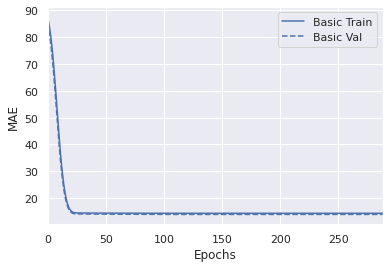

In [ ]:
plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con loss=lambda y_p, y: quantile_loss(quantile, y_p, y) como funcion de costo. quantile=0.8

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

quantile = 0.8
model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(quantile, y_p, y), metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                360       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 47us/step - loss: 76.9536 - mean_absolute_error: 96.1920 - val_loss: 76.4392 - val_mean_absolute_error: 95.5490
Epoch 2/2000
57420/57420 [==============================] - 2s 33us/step - loss: 75.5683 - mean_absolute_error: 94.4604 - val_loss: 74.5284 - val_mean_absolute_error: 93.1604
Epoch 3/2000
57420/57420 [==============================] - 2s 34us/step - loss: 73.1930 - mean_absolute_error: 91.4912 - val_loss: 71.6354 - val_mean_absolute_error: 89.5443
Epoch 4/2000
57420/57420 [==============================] - 2s 34us/step - loss: 69.8654 - mean_absolute_error: 87.3317 - val_loss: 67.7857 - val_mean_absolute_error: 84.7321
Epoch 5/2000
57420/57420 [==============================] - 2s 35us/step - loss: 65.6464 - mean_absolute_error: 82.0580 - val_loss: 63.0727 - val_mean_absolute_error: 78.8409
Epoch 6/2000
57420/57420 [==============================] - 2s 33us/step - l

Text(0, 0.5, 'MAE')

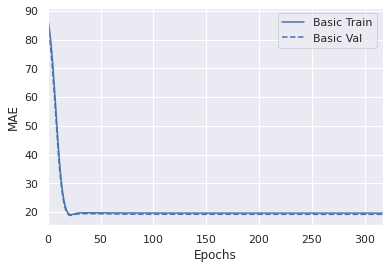

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con loss=lambda y_p, y: quantile_loss(quantile, y_p, y) como funcion de costo. quantile=0.3

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

quantile = 0.3
model.compile(optimizer='adam', loss=lambda y_p, y: quantile_loss(quantile, y_p, y), metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                360       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30)                120       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 10)                40        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 44us/step - loss: 28.8710 - mean_absolute_error: 96.2366 - val_loss: 28.6812 - val_mean_absolute_error: 95.6041
Epoch 2/2000
57420/57420 [==============================] - 2s 35us/step - loss: 28.3713 - mean_absolute_error: 94.5709 - val_loss: 27.9702 - val_mean_absolute_error: 93.2341
Epoch 3/2000
57420/57420 [==============================] - 2s 34us/step - loss: 27.4931 - mean_absolute_error: 91.6437 - val_loss: 26.8963 - val_mean_absolute_error: 89.6543
Epoch 4/2000
57420/57420 [==============================] - 2s 35us/step - loss: 26.2546 - mean_absolute_error: 87.5153 - val_loss: 25.4673 - val_mean_absolute_error: 84.8909
Epoch 5/2000
57420/57420 [==============================] - 2s 38us/step - loss: 24.6807 - mean_absolute_error: 82.2690 - val_loss: 23.7273 - val_mean_absolute_error: 79.0911
Epoch 6/2000
57420/57420 [==============================] - 2s 37us/step - l

Text(0, 0.5, 'MAE')

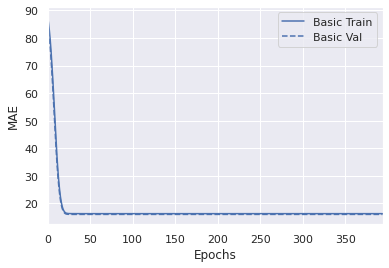

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con mean_squared error como función de costo

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30)                120       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 10)                40        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 45us/step - loss: 10618.6366 - mean_absolute_error: 96.2473 - val_loss: 10520.6701 - val_mean_absolute_error: 95.7243
Epoch 2/2000
57420/57420 [==============================] - 2s 34us/step - loss: 10319.0677 - mean_absolute_error: 94.5810 - val_loss: 10125.6875 - val_mean_absolute_error: 93.5498
Epoch 3/2000
57420/57420 [==============================] - 2s 34us/step - loss: 9799.5345 - mean_absolute_error: 91.6742 - val_loss: 9489.3199 - val_mean_absolute_error: 89.9639
Epoch 4/2000
57420/57420 [==============================] - 2s 34us/step - loss: 9100.2243 - mean_absolute_error: 87.6597 - val_loss: 8705.9800 - val_mean_absolute_error: 85.3891
Epoch 5/2000
57420/57420 [==============================] - 2s 34us/step - loss: 8273.9201 - mean_absolute_error: 82.7112 - val_loss: 7817.4614 - val_mean_absolute_error: 79.9229
Epoch 6/2000
57420/57420 [==========================

Text(0, 0.5, 'MAE')

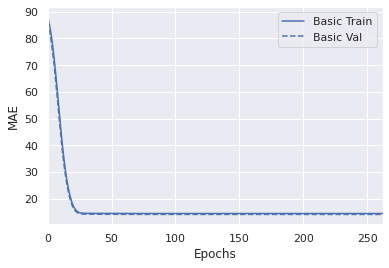

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con mean_absolute_error como función de costo

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30)                120       
_________________________________________________________________
dropout_13 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 10)                40        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 46us/step - loss: 96.1757 - mean_absolute_error: 96.1757 - val_loss: 95.3933 - val_mean_absolute_error: 95.3933
Epoch 2/2000
57420/57420 [==============================] - 2s 36us/step - loss: 94.4151 - mean_absolute_error: 94.4151 - val_loss: 92.9592 - val_mean_absolute_error: 92.9592
Epoch 3/2000
57420/57420 [==============================] - 2s 35us/step - loss: 91.4248 - mean_absolute_error: 91.4248 - val_loss: 89.2689 - val_mean_absolute_error: 89.2690
Epoch 4/2000
57420/57420 [==============================] - 2s 35us/step - loss: 87.2471 - mean_absolute_error: 87.2472 - val_loss: 84.4697 - val_mean_absolute_error: 84.4697
Epoch 5/2000
57420/57420 [==============================] - 2s 37us/step - loss: 81.9568 - mean_absolute_error: 81.9568 - val_loss: 78.5902 - val_mean_absolute_error: 78.5902
Epoch 6/2000
57420/57420 [==============================] - 2s 37us/step - l

Text(0, 0.5, 'MAE')

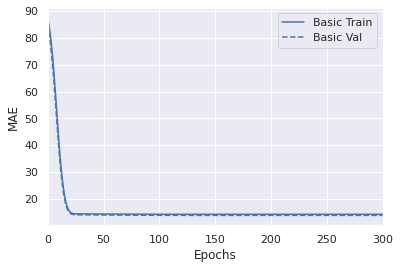

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con mean_squared_logarithmic_error como funcion de costo

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30)                120       
_________________________________________________________________
dropout_16 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 10)                40        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 47us/step - loss: 17.2013 - mean_absolute_error: 96.3725 - val_loss: 16.9381 - val_mean_absolute_error: 96.2799
Epoch 2/2000
57420/57420 [==============================] - 2s 35us/step - loss: 13.8529 - mean_absolute_error: 95.3258 - val_loss: 12.2667 - val_mean_absolute_error: 94.5919
Epoch 3/2000
57420/57420 [==============================] - 2s 36us/step - loss: 10.3399 - mean_absolute_error: 93.6083 - val_loss: 8.6262 - val_mean_absolute_error: 92.4303
Epoch 4/2000
57420/57420 [==============================] - 2s 35us/step - loss: 7.8315 - mean_absolute_error: 91.6185 - val_loss: 6.7191 - val_mean_absolute_error: 90.5257
Epoch 5/2000
57420/57420 [==============================] - 2s 35us/step - loss: 6.1742 - mean_absolute_error: 89.5294 - val_loss: 5.4373 - val_mean_absolute_error: 88.4910
Epoch 6/2000
57420/57420 [==============================] - 2s 35us/step - loss: 

Text(0, 0.5, 'MAE')

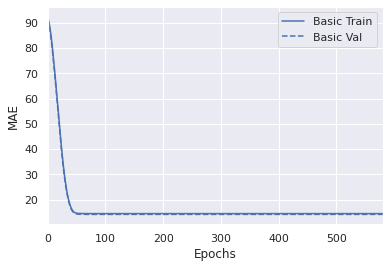

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Los errores parecen mantenerse alrededor de 14-15 con las diferentes funciones de costo que se probaron. 

#Pruebas con distintas optimizadores para ver como afectan estos en el rendimiento de la red


Prueba usando RMSprop como optimizador

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='RMSprop', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_34 (Batc (None, 30)                120       
_________________________________________________________________
dropout_34 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_35 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 10)                40        
_________________________________________________________________
dense_47 (Dense)             (None, 5)               

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 2s 42us/step - loss: 96.2549 - mean_absolute_error: 96.2549 - val_loss: 95.8347 - val_mean_absolute_error: 95.8347
Epoch 2/2000
57420/57420 [==============================] - 2s 32us/step - loss: 95.1285 - mean_absolute_error: 95.1285 - val_loss: 94.4278 - val_mean_absolute_error: 94.4278
Epoch 3/2000
57420/57420 [==============================] - 2s 34us/step - loss: 93.4854 - mean_absolute_error: 93.4854 - val_loss: 92.5229 - val_mean_absolute_error: 92.5229
Epoch 4/2000
57420/57420 [==============================] - 2s 31us/step - loss: 91.3292 - mean_absolute_error: 91.3292 - val_loss: 90.1117 - val_mean_absolute_error: 90.1117
Epoch 5/2000
57420/57420 [==============================] - 2s 33us/step - loss: 88.6619 - mean_absolute_error: 88.6619 - val_loss: 87.2217 - val_mean_absolute_error: 87.2217
Epoch 6/2000
57420/57420 [==============================] - 2s 32us/step - l

Text(0, 0.5, 'MAE')

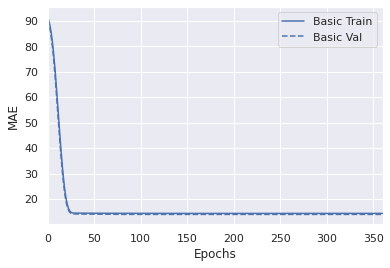

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Prueba con SGD como optimizador

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='SGD', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_37 (Batc (None, 30)                120       
_________________________________________________________________
dropout_37 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_38 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 10)                40        
_________________________________________________________________
dense_51 (Dense)             (None, 5)               

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 2s 39us/step - loss: 95.1020 - mean_absolute_error: 95.1021 - val_loss: 92.0599 - val_mean_absolute_error: 92.0599
Epoch 2/2000
57420/57420 [==============================] - 2s 29us/step - loss: 71.1030 - mean_absolute_error: 71.1029 - val_loss: 27.2355 - val_mean_absolute_error: 27.2355
Epoch 3/2000
57420/57420 [==============================] - 2s 31us/step - loss: 16.1977 - mean_absolute_error: 16.1977 - val_loss: 14.2717 - val_mean_absolute_error: 14.2717
Epoch 4/2000
57420/57420 [==============================] - 2s 29us/step - loss: 14.6000 - mean_absolute_error: 14.6000 - val_loss: 14.2414 - val_mean_absolute_error: 14.2414
Epoch 5/2000
57420/57420 [==============================] - 2s 26us/step - loss: 14.5715 - mean_absolute_error: 14.5715 - val_loss: 14.2242 - val_mean_absolute_error: 14.2242
Epoch 6/2000
57420/57420 [==============================] - 2s 26us/step - l

Text(0, 0.5, 'MAE')

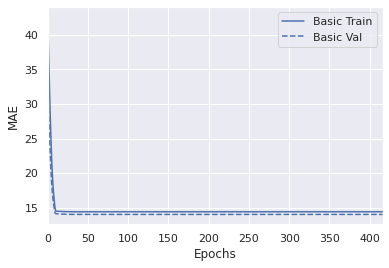

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mean_absolute_error")

plt.ylabel('MAE')

Se pudo observar que la mejor combinacion de optimizadores y funciones de costo fue MAE con Adam.

#TEST

In [ ]:
# #CAMBIAR LOSS Y OPTIMIZADOR DE ACUERDO A LO OBTENIDO ANTERIORMENTE

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=normed_train_data.shape[1]#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])


model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 30)                360       
_________________________________________________________________
batch_normalization_40 (Batc (None, 30)                120       
_________________________________________________________________
dropout_40 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_41 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 10)                40        
_________________________________________________________________
dense_55 (Dense)             (None, 5)               

In [ ]:
history=model.fit(normed_train_data, y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data,y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 48us/step - loss: 96.1889 - mean_absolute_error: 96.1889 - val_loss: 95.6270 - val_mean_absolute_error: 95.6270
Epoch 2/2000
57420/57420 [==============================] - 2s 33us/step - loss: 94.4457 - mean_absolute_error: 94.4457 - val_loss: 93.3228 - val_mean_absolute_error: 93.3228
Epoch 3/2000
57420/57420 [==============================] - 2s 36us/step - loss: 91.4629 - mean_absolute_error: 91.4629 - val_loss: 89.7661 - val_mean_absolute_error: 89.7661
Epoch 4/2000
57420/57420 [==============================] - 2s 36us/step - loss: 87.2894 - mean_absolute_error: 87.2894 - val_loss: 85.0226 - val_mean_absolute_error: 85.0226
Epoch 5/2000
57420/57420 [==============================] - 2s 34us/step - loss: 82.0024 - mean_absolute_error: 82.0024 - val_loss: 78.7602 - val_mean_absolute_error: 78.7602
Epoch 6/2000
57420/57420 [==============================] - 2s 35us/step - l

In [ ]:
test_predictions = model.predict(normed_test_data)
mean_mae=mean_absolute_error(y_test, test_predictions)
print(f'El MAE en test es {mean_mae}')
e=np.abs(test_predictions-y_test)
mean_e=np.mean(e)
desvio=np.std(e)
print('La media del error en test es:')
print(mean_e)
print('El desvio del error en test es:')
print(desvio)

El MAE en test es 14.417776620980256
La media del error en test es:
Sistolica     19.082772
Diastolica     9.752781
dtype: float64
El desvio del error en test es:
Sistolica     13.133522
Diastolica     7.532170
dtype: float64


#Conclusiones

Luego de estudiar distintas combinaciones entre optimizadores y funciones de costo, se pudo concluir que la mejor combinacion se daba cuando se usaban Adam como optimizador y MAE como función de costo para la red.

Cabe destacar que la sección "Ciclos para determinar mejores hiperparámetros" no fue corrida en esta notebook debido a su alto tiempo de procesamiento. 

En todas las combinaciones tratadas, el MAE siempre se mantuvo por encima de los 13mmHg y se pudo observar que siempre se llegaba a un plateau y la red no podía seguir aprendiendo.

Se cree que la razón por la cual la red no puede conseguir mejores resultados se debe a que su aprendizaje se ve limitado debido a una limitación de los datos proporcionados o que los mismos no son representativos de los resultados que se pretenden estimar. Una posibilidad es que debido a la alta variabilidad de los datos la red, este no puede predecir correctamente. Se pudo observar que al limitar los rangos de presión tanto sistólica como diastólica, hubo una mejora en los resultados obtenidos

Otra observación que se pudo hacer es que un aumento en la cantidad de datos no resultó en una mejora en los resultados obtenidos, ya que al principio se había decidido trabajar con 10 features por paciente (alrededor de 25000 entradas) y luego se incrementó a 30 features por paciente (alrededor de 75000). 

Por último, analizando los resultados obtenidos a la media del error y su desvío en test, se puede concluir que no se alcanzó la calidad médica esperada (5±8 mmHg). Sin embargo, se destaca que los valores de diastólica fueron estimados de forma más fidedigna, y que incluso el desvío de su error (aproximadamente 7.5mmHg) cae dentro del rango deseado. Esto se corresponde con lo estudiado en la bibliografía ya que en todos los estudios similares, la presión arterial diastólica suele poder estimarse de forma más precisa.

#Feature Selection

In [ ]:
features=pd.DataFrame()
features=dataset_bp[['PWD','RatioSPDDP','Sys_phase','Diast_phase','Continua','Ratio BA','Amplitud Sist','Energia FFT','Entropia FFT','Kurtosis FFT','Age','Gender']]
features

,PWD,RatioSPDDP,Sys_phase,Diast_phase,Continua,Ratio BA,Amplitud Sist,Energia FFT,Entropia FFT,Kurtosis FFT,Age,Gender
0,1.008,0.272727,0.216,0.792,0.515152,-1.004271,-0.003657,0.491716,2.175875,77.101415,58.78,1
1,0.904,0.202128,0.152,0.752,0.489736,-1.444114,-0.010628,0.507864,2.503912,60.760874,58.78,1
2,0.968,0.551282,0.344,0.624,0.446725,-1.203756,-0.001393,0.715486,2.243611,54.338103,58.78,1
3,0.984,0.576923,0.360,0.624,0.450635,-1.096413,0.005625,0.736935,2.437377,51.465057,58.78,1
4,0.920,0.352941,0.240,0.680,0.494624,-1.450588,0.003157,0.499760,2.165449,59.171351,58.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75054,1.536,0.142857,0.192,1.344,0.293255,-1.145793,0.330923,34.392361,2.839660,20.962611,65.26,1
75055,0.944,0.242105,0.184,0.760,0.367546,-0.955303,0.386031,25.888029,2.571587,21.511180,65.26,1
75056,0.776,0.366197,0.208,0.568,0.265885,-0.801683,0.225376,8.215825,2.115532,23.175275,65.26,1
75057,0.800,0.282051,0.176,0.624,0.313783,-1.034983,0.193274,9.239781,2.580609,19.873318,65.26,1


## Analisis BP Sistolica

In [ ]:
bp=dataset_bp[['Sistolica']]
bp

,Sistolica
0,138.754980
1,139.732816
2,140.221734
3,140.515085
4,141.297354
...,...
75054,98.174771
75055,100.814929
75056,97.783636
75057,96.121314


In [ ]:
x,x_test,y,y_test=train_test_split(features, bp,test_size=0.1, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.1, random_state=42)
train_stats = x_train.describe()
train_stats = train_stats.transpose()

normed_train_data = norm(x_train)
normed_test_data = norm(x_test)
normed_val_data=norm(x_val)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(normed_train_data, y_train, normed_val_data)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 226.182820
Feature 1: 846.028859
Feature 2: 80.286584
Feature 3: 325.003605
Feature 4: 477.764958
Feature 5: 135.832880
Feature 6: 852.403884
Feature 7: 1071.134935
Feature 8: 132.301824
Feature 9: 7.129843
Feature 10: 36.367065
Feature 11: 68.207914


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


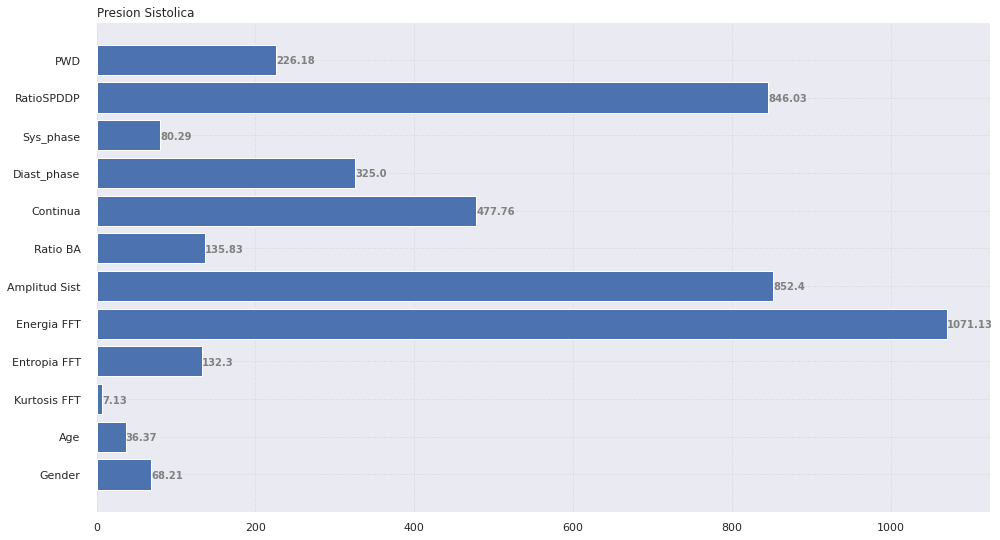

In [ ]:
nombres_features = ['PWD','RatioSPDDP','Sys_phase','Diast_phase','Continua','Ratio BA','Amplitud Sist','Energia FFT','Entropia FFT','Kurtosis FFT','Age','Gender']
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(nombres_features, fs.scores_) 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 

ax.set_title('Presion Sistolica', 
             loc ='left', ) 

plt.show()

## Analisis BP Diastolica

In [ ]:
bp=dataset_bp[['Diastolica']]
bp

,Diastolica
0,65.417253
1,65.417253
2,65.319469
3,65.319469
4,65.612820
...,...
75054,51.238625
75055,45.371607
75056,45.469391
75057,50.358573


In [ ]:
x,x_test,y,y_test=train_test_split(features, bp,test_size=0.1, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.1, random_state=42)
train_stats = x_train.describe()
train_stats = train_stats.transpose()

normed_train_data = norm(x_train)
normed_test_data = norm(x_test)
normed_val_data=norm(x_val)

In [ ]:
X_train_fs, X_test_fs, fs = select_features(normed_train_data, y_train, normed_val_data)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 26.200062
Feature 1: 174.908458
Feature 2: 302.860352
Feature 3: 0.886776
Feature 4: 312.594820
Feature 5: 21.686130
Feature 6: 56.924345
Feature 7: 98.756744
Feature 8: 19.018991
Feature 9: 31.537970
Feature 10: 3062.345468
Feature 11: 81.130123


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


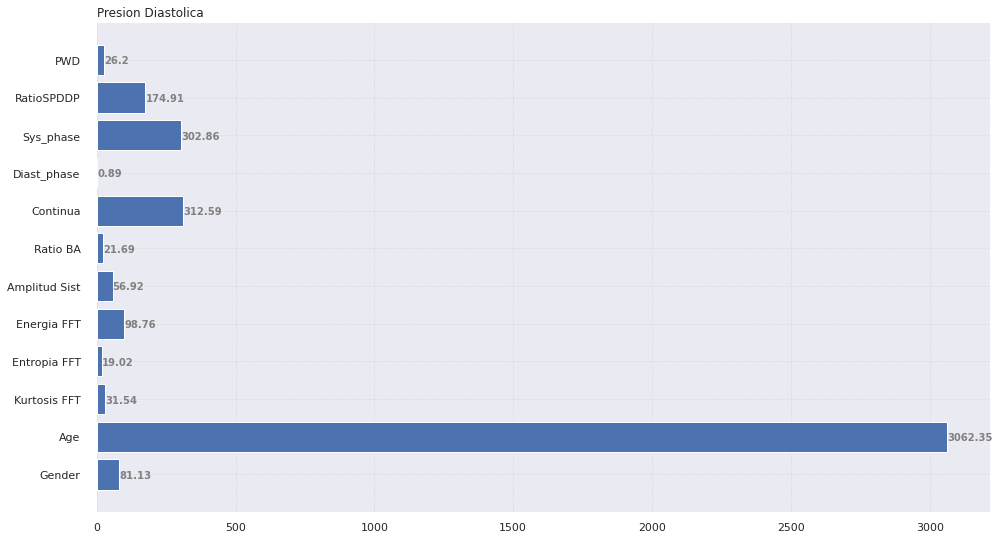

In [ ]:
nombres_features = ['PWD','RatioSPDDP','Sys_phase','Diast_phase','Continua','Ratio BA','Amplitud Sist','Energia FFT','Entropia FFT','Kurtosis FFT','Age','Gender']
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(nombres_features, fs.scores_) 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 

ax.set_title('Presion Diastolica', 
             loc ='left', ) 

plt.show()

# Prueba Diastolica Age

In [ ]:
y_train_diast = y_train['Diastolica']
y_val_diast = y_val['Diastolica']
y_test_diast = y_test['Diastolica']

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=200,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=1#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                60        
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
history=model.fit(normed_train_data['Age'], y_train_diast, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data['Age'],y_val_diast),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 2s 42us/step - loss: 64.5050 - mean_absolute_error: 64.5050 - val_loss: 63.8406 - val_mean_absolute_error: 63.8406
Epoch 2/2000
57420/57420 [==============================] - 2s 33us/step - loss: 62.5599 - mean_absolute_error: 62.5599 - val_loss: 61.3535 - val_mean_absolute_error: 61.3535
Epoch 3/2000
57420/57420 [==============================] - 2s 33us/step - loss: 59.4170 - mean_absolute_error: 59.4170 - val_loss: 57.8405 - val_mean_absolute_error: 57.8405
Epoch 4/2000
57420/57420 [==============================] - 2s 32us/step - loss: 55.1083 - mean_absolute_error: 55.1084 - val_loss: 52.9276 - val_mean_absolute_error: 52.9276
Epoch 5/2000
57420/57420 [==============================] - 2s 33us/step - loss: 49.6996 - mean_absolute_error: 49.6996 - val_loss: 45.9518 - val_mean_absolute_error: 45.9518
Epoch 6/2000
57420/57420 [==============================] - 2s 33us/step - l

In [ ]:
y_test_diast.values

array([87.69958922, 52.81019395, 58.66176923, ..., 67.1875    ,
       51.45844054, 69.6373057 ])

In [ ]:
test_predictions = model.predict(normed_test_data['Age'])
mean_mae=mean_absolute_error(y_test_diast, test_predictions)
print(f'El MAE en test es {mean_mae}')
e=np.abs(test_predictions-y_test_diast.values)
mean_e=np.mean(e)
desvio=np.std(e)
print('La media del error en test es:')
print(mean_e)
print('El desvio del error en test es:')
print(desvio)

El MAE en test es 9.641537255629995
La media del error en test es:
10.243866569630383
El desvio del error en test es:
7.775888690235606


# Prueba Sistolica 3 Top Features

In [ ]:
top_feat_sist = ['Energia FFT','RatioSPDDP','Amplitud Sist']

y_train_sist = y_train['Sistolica']
y_val_sist = y_val['Sistolica']
y_test_sist = y_test['Sistolica']

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=50,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=3#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                120       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30)                120       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 10)                40        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data[top_feat_sist], y_train_sist, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data[top_feat_sist],y_val_sist),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 2s 42us/step - loss: 127.6533 - mean_absolute_error: 127.6533 - val_loss: 126.8449 - val_mean_absolute_error: 126.8449
Epoch 2/2000
57420/57420 [==============================] - 2s 33us/step - loss: 125.7293 - mean_absolute_error: 125.7292 - val_loss: 124.2982 - val_mean_absolute_error: 124.2982
Epoch 3/2000
57420/57420 [==============================] - 2s 33us/step - loss: 122.6081 - mean_absolute_error: 122.6081 - val_loss: 120.4917 - val_mean_absolute_error: 120.4917
Epoch 4/2000
57420/57420 [==============================] - 2s 34us/step - loss: 118.3197 - mean_absolute_error: 118.3197 - val_loss: 115.4173 - val_mean_absolute_error: 115.4173
Epoch 5/2000
57420/57420 [==============================] - 2s 33us/step - loss: 112.9293 - mean_absolute_error: 112.9293 - val_loss: 109.5369 - val_mean_absolute_error: 109.5369
Epoch 6/2000
57420/57420 [==============================

# Prueba Sistolica 5 Top Features

In [ ]:
top_feat_sist = ['Energia FFT','RatioSPDDP','Amplitud Sist', 'Continua', 'Diast_phase']

y_train_sist = y_train['Sistolica']
y_val_sist = y_val['Sistolica']
y_test_sist = y_test['Sistolica']

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=25,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=5#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 30)                180       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30)                120       
_________________________________________________________________
dropout_19 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_20 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 10)                40        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data[top_feat_sist], y_train_sist, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data[top_feat_sist],y_val_sist),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 44us/step - loss: 127.6128 - mean_absolute_error: 127.6128 - val_loss: 126.7486 - val_mean_absolute_error: 126.7487
Epoch 2/2000
57420/57420 [==============================] - 2s 34us/step - loss: 125.6042 - mean_absolute_error: 125.6042 - val_loss: 124.0455 - val_mean_absolute_error: 124.0455
Epoch 3/2000
57420/57420 [==============================] - 2s 34us/step - loss: 122.4023 - mean_absolute_error: 122.4023 - val_loss: 120.2150 - val_mean_absolute_error: 120.2150
Epoch 4/2000
57420/57420 [==============================] - 2s 34us/step - loss: 118.0427 - mean_absolute_error: 118.0426 - val_loss: 115.2025 - val_mean_absolute_error: 115.2025
Epoch 5/2000
57420/57420 [==============================] - 2s 33us/step - loss: 112.5882 - mean_absolute_error: 112.5882 - val_loss: 109.0830 - val_mean_absolute_error: 109.0830
Epoch 6/2000
57420/57420 [==============================

# Prueba Diastolica Age y Sistolica Top 5 Features

In [ ]:
top_feat_sist = ['Energia FFT','RatioSPDDP','Amplitud Sist', 'Continua', 'Diast_phase']
feat_list = top_feat_sist + ['Age']

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.00000001,verbose=True)
stopper=EarlyStopping(monitor="val_loss",patience=25,verbose=True,restore_best_weights=True)
model=Sequential()
n_cols=len(feat_list)#como la cantidad de features que tiene va variando en cada vez es necesario redefinir la mlp
model.add(Dense(30, activation='elu',input_shape=(n_cols,)))
# ,kernel_initializer='he_uniform'
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='elu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(2,activation='linear'))
#model.compile(loss=huber_loss_wrapper(delta=0.5), optimizer= 'Adam', metrics=['mean_absolute_error'])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                210       
_________________________________________________________________
batch_normalization_25 (Batc (None, 30)                120       
_________________________________________________________________
dropout_25 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 10)                40        
_________________________________________________________________
dense_35 (Dense)             (None, 5)                

In [ ]:
history=model.fit(normed_train_data[feat_list], y_train, batch_size=256, epochs=2000, verbose=1, shuffle=True, validation_data=(normed_val_data[feat_list],y_val),callbacks=[stopper,reduce_lr])

Train on 57420 samples, validate on 3023 samples
Epoch 1/2000
57420/57420 [==============================] - 3s 44us/step - loss: 96.1637 - mean_absolute_error: 96.1636 - val_loss: 95.8886 - val_mean_absolute_error: 95.8886
Epoch 2/2000
57420/57420 [==============================] - 2s 32us/step - loss: 94.3741 - mean_absolute_error: 94.3740 - val_loss: 93.6710 - val_mean_absolute_error: 93.6710
Epoch 3/2000
57420/57420 [==============================] - 2s 33us/step - loss: 91.3538 - mean_absolute_error: 91.3538 - val_loss: 90.1860 - val_mean_absolute_error: 90.1860
Epoch 4/2000
57420/57420 [==============================] - 2s 33us/step - loss: 87.1500 - mean_absolute_error: 87.1500 - val_loss: 85.5943 - val_mean_absolute_error: 85.5943
Epoch 5/2000
57420/57420 [==============================] - 2s 33us/step - loss: 81.8367 - mean_absolute_error: 81.8367 - val_loss: 79.4576 - val_mean_absolute_error: 79.4576
Epoch 6/2000
57420/57420 [==============================] - 2s 33us/step - l

In [ ]:
test_predictions = model.predict(normed_test_data[feat_list])
mean_mae=mean_absolute_error(y_test, test_predictions)
print(f'El MAE en test es {mean_mae}')
e=np.abs(test_predictions-y_test)
mean_e=np.mean(e)
desvio=np.std(e)
print('La media del error en test es:')
print(mean_e)
print('El desvio del error en test es:')
print(desvio)

El MAE en test es 14.525685142807479
La media del error en test es:
Sistolica     19.299587
Diastolica     9.751783
dtype: float64
El desvio del error en test es:
Sistolica     13.114305
Diastolica     7.484485
dtype: float64


# Dataset para CNN

Con el siguiente código se obtienen los pulsos de PPG con sus respectivos valores de sistólica y diastólica.

In [ ]:
path_ppg='/content/drive/My Drive/Proyecto Final/Pulsos/p0'
path_abp='/content/drive/My Drive/Proyecto Final/Features/p0'
import csv
ppg=pd.DataFrame()
abp=pd.DataFrame()
num_archivos=10
for parte in range(10):
  print(parte)
  s=os.listdir(path_ppg+str(parte)) 
  #print('p0'+str(parte))
  #print(s)
  segs=125*3
  for archivo in s:
    archivo_abp=pd.read_csv(path_abp+str(parte) +'/'+archivo, sep=',', encoding='utf-8', quotechar='"', decimal='.', error_bad_lines=False)
    #print(archivo_abp[['Sistolica','Diastolica']])
    with open(path_ppg+str(parte) +'/'+ archivo) as csv_file:
      file = csv.reader(csv_file, delimiter=',',)
      i=0
      for row in file:
        if (i<num_archivos):
          ppg_signal=[float(i) for i in row]+list(np.zeros(segs-len(row)))
          ppg=pd.concat([ppg,pd.DataFrame(ppg_signal)],axis=1)
          #print(ppg)
          i+=1
        else:
          break
      j=0
      for idx,abp_signal in archivo_abp.iterrows():
        if (j<num_archivos):
          abp=pd.concat([abp,abp_signal[['Sistolica','Diastolica']]],axis=1)

          j+=1
        else:
          break

In [ ]:
ppg=pd.read_csv('/content/drive/My Drive/Proyecto Final/ppg_cnn_10.csv',sep=',')
abp=pd.read_csv('/content/drive/My Drive/Proyecto Final/abp_cnn_10.csv',sep=',')

In [ ]:
ppg=ppg.drop(['Unnamed: 0'], axis = 1)
ppg

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.25032,0.25033,0.25034,0.25035,0.25036,0.25037,0.25038,0.25039,0.25040,0.25041,0.25042,0.25043,0.25044,0.25045,0.25046,0.25047,0.25048,0.25049,0.25050,0.25051,0.25052,0.25053,0.25054,0.25055,0.25056,0.25057,0.25058,0.25059,0.25060,0.25061,0.25062,0.25063,0.25064,0.25065,0.25066,0.25067,0.25068,0.25069,0.25070,0.25071
0,0.515152,0.489736,0.446725,0.450635,0.494624,0.496579,0.439883,0.471163,0.493646,0.460411,0.448680,0.395894,0.401760,0.402737,0.420332,0.371457,0.354839,0.427175,0.411535,0.418377,0.296188,0.239492,0.178886,0.269795,0.504399,0.471163,0.316716,0.411535,0.379277,0.417400,0.246334,0.320626,0.271750,0.318671,0.276637,0.311828,0.350929,0.333333,0.340176,0.328446,...,1.356794,1.300098,1.182796,1.138807,1.142717,1.343109,1.294233,1.206256,1.323558,1.240469,0.226784,0.419355,0.350929,0.303030,0.388074,0.321603,0.322581,0.341153,0.309873,0.362659,1.136852,1.271750,1.345064,1.245357,1.185728,1.148583,1.059629,1.234604,1.372434,1.256109,0.332356,0.283480,0.290323,0.286413,0.279570,0.327468,0.307918,0.351906,0.310850,0.345064
1,0.518084,0.491691,0.447703,0.452590,0.497556,0.496579,0.439883,0.473118,0.498534,0.461388,0.473118,0.395894,0.424242,0.405670,0.436950,0.381232,0.354839,0.451613,0.440860,0.443793,0.313783,0.259042,0.188661,0.282502,0.520039,0.488759,0.334311,0.427175,0.392962,0.430108,0.246334,0.349951,0.268817,0.347996,0.275660,0.321603,0.383187,0.367546,0.376344,0.362659,...,1.502444,1.396872,1.306940,1.334311,1.253177,1.439883,1.411535,1.303030,1.445748,1.352884,0.225806,0.435973,0.371457,0.316716,0.411535,0.339198,0.343109,0.356794,0.328446,0.381232,1.252199,1.374389,1.442815,1.327468,1.277615,1.236559,1.169110,1.331378,1.446725,1.337243,0.361681,0.286413,0.308895,0.304985,0.299120,0.355816,0.336266,0.378299,0.330401,0.372434
2,0.521017,0.495601,0.448680,0.453568,0.500489,0.496579,0.439883,0.476051,0.503421,0.463343,0.498534,0.395894,0.450635,0.408602,0.459433,0.396872,0.354839,0.480938,0.470186,0.473118,0.331378,0.278592,0.198436,0.295210,0.536657,0.506354,0.350929,0.443793,0.407625,0.444770,0.246334,0.390029,0.264907,0.386119,0.274682,0.338221,0.426197,0.410557,0.420332,0.405670,...,1.644184,1.508309,1.458456,1.492669,1.391984,1.550342,1.552297,1.427175,1.571848,1.492669,0.224829,0.457478,0.394917,0.334311,0.436950,0.361681,0.365591,0.376344,0.349951,0.403715,1.390029,1.501466,1.565005,1.434995,1.394917,1.348974,1.288368,1.451613,1.533724,1.442815,0.396872,0.289345,0.334311,0.327468,0.325513,0.388074,0.368524,0.411535,0.352884,0.405670
3,0.523949,0.499511,0.448680,0.454545,0.503421,0.497556,0.440860,0.478983,0.507331,0.464321,0.526882,0.397849,0.479961,0.415445,0.485826,0.417400,0.353861,0.510264,0.499511,0.504399,0.348974,0.296188,0.207234,0.307918,0.554252,0.522972,0.369501,0.461388,0.420332,0.458456,0.246334,0.438905,0.261975,0.432063,0.273705,0.363636,0.477028,0.460411,0.468231,0.455523,...,1.787879,1.655914,1.631476,1.666667,1.629521,1.692082,1.711632,1.573803,1.705767,1.654936,0.224829,0.481916,0.420332,0.354839,0.465298,0.386119,0.390029,0.398827,0.373412,0.427175,1.543500,1.649071,1.706745,1.546432,1.534702,1.483871,1.423265,1.571848,1.649071,1.569892,0.434995,0.293255,0.364614,0.358749,0.355816,0.423265,0.399804,0.449658,0.378299,0.441838
4,0.526882,0.504399,0.448680,0.457478,0.506354,0.497556,0.441838,0.482893,0.511241,0.466276,0.556207,0.400782,0.510264,0.424242,0.514174,0.442815,0.353861,0.539589,0.524927,0.534702,0.364614,0.311828,0.216031,0.320626,0.571848,0.538612,0.389052,0.478983,0.433040,0.473118,0.246334,0.491691,0.259042,0.482893,0.272727,0.391007,0.529814,0.513196,0.518084,0.507331,...,1.956012,1.825024,1.816227,1.939394,1.780059,1.853372,1.880743,1.737048,1.869013,1.830890,0.223851,0.509286,0.447703,0.377322,0.494624,0.413490,0.416422,0.424242,0.398827,0.453568,1.705767,1.811339,1.863148,1.664712,1

In [ ]:
abp=abp.drop(['Unnamed: 0'], axis = 1)
abp

,0,1,2,3,4,5,6,7,8,9,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,...,0.2505,1.2505,2.2504,3.2504,4.2504,5.2503,6.2502,7.2502,8.2502,9.2501,0.2506,1.2506,2.2505,3.2505,4.2505,5.2504,6.2503,7.2503,8.2503,9.2502,0.2507,1.2507,2.2506,3.2506,4.2506,5.2505,6.2504,7.2504,8.2504,9.2503,0.2508,1.2508,2.2507,3.2507,4.2507,5.2506,6.2505,7.2505,8.2505,9.2504
0,138.754980,139.732816,140.221734,140.515085,141.297354,141.004003,140.612869,141.590705,142.275191,142.079623,132.985745,134.354716,132.496827,130.15002,132.203476,133.083529,122.522896,112.744532,113.233451,109.224322,150.977934,149.902314,148.826694,146.479887,150.000098,149.902314,147.262156,147.653291,151.564636,152.444689,115.678042,115.678042,112.451182,112.451182,108.050918,108.050918,111.668912,117.144796,117.633714,116.655878,...,185.021467,185.021467,185.021467,185.021467,185.021467,185.021467,185.021467,185.021467,185.021467,185.021467,111.864480,113.722369,114.602422,113.331234,115.189123,115.580258,114.504638,115.580258,115.384691,115.678042,126.750451,126.750451,127.116781,127.556378,127.067937,126.506230,125.627036,124.528044,124.650154,124.869953,97.783636,101.499414,102.868385,103.552871,104.335140,103.357303,102.966169,103.552871,104.041789,103.846222
1,65.417253,65.417253,65.319469,65.319469,65.612820,65.612820,64.928334,65.319469,65.808387,65.417253,75.293400,73.142160,72.946593,75.29340,76.075669,71.870973,96.903583,79.009178,61.408123,58.963533,70.306434,69.426382,70.306434,68.839680,70.404218,70.795353,68.839680,69.230814,71.968756,73.044376,58.767965,58.767965,58.670182,58.670182,58.279047,58.279047,58.474614,59.550234,60.528071,59.941369,...,99.935037,100.765387,100.692121,100.032726,100.032726,99.812927,100.301368,100.130414,99.910615,100.252524,44.882689,46.349444,46.838362,45.958309,46.740578,47.033929,46.349444,46.642794,46.740578,47.033929,52.849321,52.849321,53.191230,53.288918,52.824899,52.678366,52.116659,51.335154,51.481686,51.579374,51.825327,51.531976,52.118678,51.531976,52.020894,53.878783,53.976567,50.847491,50.749707,54.856620


In [ ]:
ppg_t=np.transpose(ppg)
ppg_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,0.515152,0.518084,0.521017,0.523949,0.526882,0.530792,0.533724,0.535679,0.536657,0.536657,0.537634,0.539589,0.541544,0.542522,0.544477,0.547410,0.548387,0.550342,0.551320,0.552297,0.553275,0.553275,0.552297,0.551320,0.548387,0.546432,0.544477,0.543500,0.542522,0.540567,0.539589,0.539589,0.538612,0.537634,0.537634,0.537634,0.537634,0.537634,0.537634,0.537634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1,0.489736,0.491691,0.495601,0.499511,0.504399,0.508309,0.512219,0.516129,0.520039,0.522972,0.521017,0.518084,0.517107,0.518084,0.520039,0.521017,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.446725,0.447703,0.448680,0.448680,0.448680,0.448680,0.449658,0.451613,0.453568,0.457478,0.462366,0.467253,0.471163,0.476051,0.480938,0.485826,0.489736,0.492669,0.494624,0.495601,0.495601,0.495601,0.495601,0.496579,0.498534,0.499511,0.501466,0.503421,0.504399,0.505376,0.506354,0.506354,0.508309,0.510264,0.510264,0.511241,0.511241,0.511241,0.511241,0.511241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.3,0.450635,0.452590,0.453568,0.454545,0.457478,0.458456,0.461388,0.464321,0.467253,0.470186,0.473118,0.475073,0.478983,0.483871,0.488759,0.493646,0.497556,0.500489,0.503421,0.505376,0.508309,0.511241,0.514174,0.517107,0.519062,0.521017,0.521017,0.521994,0.521994,0.521994,0.521994,0.521994,0.526882,0.533724,0.537634,0.539589,0.540567,0.541544,0.541544,0.541544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,0.494624,0.497556,0.500489,0.503421,0.506354,0.509286,0.514174,0.518084,0.521017,0.524927,0.528837,0.531769,0.535679,0.538612,0.539589,0.541544,0.542522,0.543500,0.544477,0.546432,0.548387,0.551320,0.552297,0.553275,0.553275,0.552297,0.550342,0.547410,0.545455,0.543500,0.542522,0.541544,0.541544,0.540567,0.538612,0.537634,0.536657,0.536657,0.536657,0.536657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
abp.head()
abp_t=np.transpose(abp)
abp_t.head()

,0,1
0,138.754980,65.417253
1,139.732816,65.417253
2,140.221734,65.319469
3,140.515085,65.319469
4,141.297354,65.612820


Estandarización

In [ ]:
features = ppg_t
features_norm = (features - features.mean()) / features.std()

In [ ]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(features_norm, abp_t,test_size=0.1, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.1, random_state=42)

In [ ]:
x_train=np.array(x_train).reshape(-1,375,1)
x_val=np.array(x_val).reshape(-1,375,1)

# CNN

Se analizaron distintas arquitecturas de redes convolucionales modificiando la cantidad de filtros, capas y el tamaño del kernel.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Activation,BatchNormalization, Convolution2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# define the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.0000001,verbose=True)

stopper=EarlyStopping(monitor="val_loss",patience=50,verbose=True,restore_best_weights=True)

model = Sequential()
model.add(Conv1D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(375,1)))
model.add(BatchNormalization())

model.add(Conv1D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.5)) #subo??
model.add(BatchNormalization())

model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.2)) #subo??
model.add(BatchNormalization())

model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.2)) #subo??
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5)) #subo??
model.add(BatchNormalization())


model.add(Dense(2, activation='linear'))#input: 512 #output:100 
model.summary()

from keras.optimizers import Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), 
                  metrics=['mean_absolute_error'])

hist=model.fit(x_train, y_train, batch_size=128, epochs=2000, verbose=2,shuffle=True,validation_data=(x_val,y_val),callbacks=[stopper,reduce_lr])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 375, 16)           64        
_________________________________________________________________
batch_normalization_1 (Batch (None, 375, 16)           64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 375, 64)           3136      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 187, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 187, 64)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 187, 64)           256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 187, 128)         

Modificamos al dataset para quedarnos con señales de 1 segundo. Consultando en la bibliografía, se decidió este umbral ya que el promedio de duración de los pulsos es de 21 segundo (60 bpm).

In [ ]:
ppg_t_cut=np.transpose(ppg[:125])
ppg_t_cut

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
0,0.515152,0.518084,0.521017,0.523949,0.526882,0.530792,0.533724,0.535679,0.536657,0.536657,0.537634,0.539589,0.541544,0.542522,0.544477,0.547410,0.548387,0.550342,0.551320,0.552297,0.553275,0.553275,0.552297,0.551320,0.548387,0.546432,0.544477,0.543500,0.542522,0.540567,0.539589,0.539589,0.538612,0.537634,0.537634,0.537634,0.537634,0.537634,0.537634,0.537634,...,0.514174,0.514174,0.514174,0.514174,0.513196,0.512219,0.510264,0.509286,0.508309,0.506354,0.505376,0.504399,0.503421,0.501466,0.498534,0.495601,0.493646,0.490714,0.488759,0.486804,0.484848,0.483871,0.482893,0.482893,0.482893,0.482893,0.482893,0.482893,0.482893,0.482893,0.481916,0.479961,0.478983,0.478006,0.478006,0.478006,0.478006,0.479961,0.481916,0.484848
0.1,0.489736,0.491691,0.495601,0.499511,0.504399,0.508309,0.512219,0.516129,0.520039,0.522972,0.521017,0.518084,0.517107,0.518084,0.520039,0.521017,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,0.521994,...,0.480938,0.479961,0.477028,0.475073,0.474096,0.473118,0.473118,0.472141,0.470186,0.469208,0.467253,0.465298,0.462366,0.459433,0.455523,0.451613,0.448680,0.447703,0.446725,0.446725,0.446725,0.446725,0.446725,0.446725,0.446725,0.446725,0.446725,0.446725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.2,0.446725,0.447703,0.448680,0.448680,0.448680,0.448680,0.449658,0.451613,0.453568,0.457478,0.462366,0.467253,0.471163,0.476051,0.480938,0.485826,0.489736,0.492669,0.494624,0.495601,0.495601,0.495601,0.495601,0.496579,0.498534,0.499511,0.501466,0.503421,0.504399,0.505376,0.506354,0.506354,0.508309,0.510264,0.510264,0.511241,0.511241,0.511241,0.511241,0.511241,...,0.479961,0.479961,0.479961,0.477028,0.474096,0.471163,0.469208,0.467253,0.465298,0.463343,0.463343,0.461388,0.459433,0.457478,0.457478,0.457478,0.456500,0.456500,0.455523,0.452590,0.450635,0.447703,0.444770,0.442815,0.441838,0.439883,0.439883,0.439883,0.440860,0.440860,0.440860,0.441838,0.442815,0.443793,0.444770,0.447703,0.000000,0.000000,0.000000,0.000000
0.3,0.450635,0.452590,0.453568,0.454545,0.457478,0.458456,0.461388,0.464321,0.467253,0.470186,0.473118,0.475073,0.478983,0.483871,0.488759,0.493646,0.497556,0.500489,0.503421,0.505376,0.508309,0.511241,0.514174,0.517107,0.519062,0.521017,0.521017,0.521994,0.521994,0.521994,0.521994,0.521994,0.526882,0.533724,0.537634,0.539589,0.540567,0.541544,0.541544,0.541544,...,0.513196,0.513196,0.513196,0.513196,0.513196,0.513196,0.511241,0.509286,0.508309,0.505376,0.504399,0.501466,0.499511,0.498534,0.497556,0.497556,0.497556,0.497556,0.496579,0.494624,0.493646,0.492669,0.492669,0.491691,0.491691,0.491691,0.491691,0.489736,0.487781,0.487781,0.486804,0.486804,0.486804,0.487781,0.488759,0.489736,0.491691,0.492669,0.000000,0.000000
0.4,0.494624,0.497556,0.500489,0.503421,0.506354,0.509286,0.514174,0.518084,0.521017,0.524927,0.528837,0.531769,0.535679,0.538612,0.539589,0.541544,0.542522,0.543500,0.544477,0.546432,0.548387,0.551320,0.552297,0.553275,0.553275,0.552297,0.550342,0.547410,0.545455,0.543500,0.542522,0.541544,0.541544,0.540567,0.538612,0.537634,0.536657,0.536657,0.536657,0.536657,...,0.514174,0.512219,0.511241,0.510264,0.510264,0.510264,0.510264,0.510264,0.510264,0.510264,0.510264,0.509286,0.506354,0.503421,0.501466,0.499511,0.496579,0.494624,0.491691,0.490714,0.489736,0.487781,0.487781,0.486804,0.486804,0.487781,0.489736,0.490714,0.492669,0.494624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
features = ppg_t_cut
features_norm = (features - features.mean()) / features.std()

In [ ]:
x,x_test,y,y_test=train_test_split(features_norm, abp_t,test_size=0.1, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x, y,test_size=0.1, random_state=42)

In [ ]:
x_train_cut=np.array(x_train).reshape(-1,125,1)
x_val_cut=np.array(x_val).reshape(-1,125,1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Activation,BatchNormalization, Convolution2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# define the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.0000001,verbose=True)

stopper=EarlyStopping(monitor="val_loss",patience=50,verbose=True,restore_best_weights=True)

model = Sequential()
model.add(Conv1D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(125,1)))
model.add(BatchNormalization())

model.add(Conv1D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.5)) #subo??
model.add(BatchNormalization())

model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.2)) #subo??
model.add(BatchNormalization())

model.add(Conv1D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(rate=0.2)) #subo??
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5)) #subo??
model.add(BatchNormalization())


model.add(Dense(2, activation='linear'))#input: 512 #output:100 
model.summary()

from keras.optimizers import Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), 
                  metrics=['mean_absolute_error'])

hist=model.fit(x_train_cut, y_train, batch_size=128, epochs=2000, verbose=2,shuffle=True,validation_data=(x_val_cut,y_val),callbacks=[stopper,reduce_lr])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 125, 16)           64        
_________________________________________________________________
batch_normalization_11 (Batc (None, 125, 16)           64        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 125, 64)           3136      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 62, 64)            0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 62, 64)            256       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 62, 128)          

## TEST CNN

In [ ]:
x_test_cut=np.array(x_test).reshape(-1,125,1)
test_predictions = model.predict(x_test_cut)
mean_mae=mean_absolute_error(y_test, test_predictions)
print(f'El MAE en test es {mean_mae}')
e=np.abs(test_predictions-y_test)
mean_e=np.mean(e)
desvio=np.std(e)
print('La media del error en test es:')
print(mean_e)
print('El desvio del error en test es:')
print(desvio)

El MAE en test es 15.347880541111978
La media del error en test es:
0    19.078231
1    11.617530
dtype: float64
El desvio del error en test es:
0    15.619196
1    11.919128
dtype: float64
